# Step 1: Load the Data

In this step, we load the dataset containing paired linear and nonlinear FEA results. The dataset includes:
- Input features (X): Linear von Mises stress (`Sigma_linear_VM`), maximum principal stress (`Sigma_linear_MaxP`), and equivalent linear strain (`Epsilon_linear_Equiv`).
- Output labels (Y): Nonlinear von Mises stress (`Sigma_nonlinear_VM`), maximum principal stress (`Sigma_nonlinear_MaxP`), and nonlinear strain components (`Epsilon_nonlinear_Plastic`, `Epsilon_nonlinear_Total`, `Epsilon_nonlinear_Elastic`).

We’ll use pandas to read the CSV file, inspect the data for correctness, and separate the features (X) and labels (Y). Material properties (`E`, `Et`, `Sigma_y`) are present but will not be used as input features for this model.

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (replace 'your_data.csv' with your actual file path)
data_path = 'data_training_3.csv'  # Update this to your file location
df = pd.read_csv(data_path)

# Display the first few rows to verify the data
print("First 5 rows of the dataset:")
display(df.head())

# Check basic info about the dataset (e.g., missing values, data types)
print("\nDataset Info:")
df.info()

# Define input features (X) and output labels (Y) based on column names
X_columns = ['Sigma_linear_VM', 'Sigma_linear_MaxP', 'Epsilon_linear_Equiv']
Y_columns = ['Sigma_nonlinear_VM', 'Sigma_nonlinear_MaxP', 'Epsilon_nonlinear_Plastic', 
             'Epsilon_nonlinear_Total', 'Epsilon_nonlinear_Elastic']

# Extract features and labels
X = df[X_columns]
y = df[Y_columns]

# Verify the shapes of X and y
print("\nShape of input features (X):", X.shape)
print("Shape of output labels (y):", y.shape)

# Quick check for missing values
print("\nMissing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

First 5 rows of the dataset:


,E,Et,Sigma_y,Sigma_linear_VM,Sigma_linear_MaxP,Epsilon_linear_Equiv,Sigma_nonlinear_VM,Sigma_nonlinear_MaxP,Epsilon_nonlinear_Plastic,Epsilon_nonlinear_Total,Epsilon_nonlinear_Elastic
0,210.0,1450.0,250.0,340.152341,376.170872,0.001701,256.969516,289.431182,0.000582,0.001837,0.001285
1,210.0,1450.0,250.0,742.458034,822.655297,0.003713,456.448510,530.451346,0.142280,0.144569,0.002290
2,210.0,1450.0,250.0,15.276877,16.785102,0.000076,15.276102,16.784154,0.000000,0.000076,0.000076
3,210.0,1450.0,250.0,19.682425,21.835217,0.000098,19.682100,21.834703,0.000000,0.000098,0.000098
4,210.0,1450.0,250.0,614.144310,674.681316,0.003071,425.503722,475.923559,0.120212,0.122341,0.002129



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   E                          200 non-null    float64
 1   Et                         200 non-null    float64
 2   Sigma_y                    200 non-null    float64
 3   Sigma_linear_VM            200 non-null    float64
 4   Sigma_linear_MaxP          200 non-null    float64
 5   Epsilon_linear_Equiv       200 non-null    float64
 6   Sigma_nonlinear_VM         200 non-null    float64
 7   Sigma_nonlinear_MaxP       200 non-null    float64
 8   Epsilon_nonlinear_Plastic  200 non-null    float64
 9   Epsilon_nonlinear_Total    200 non-null    float64
 10  Epsilon_nonlinear_Elastic  200 non-null    float64
dtypes: float64(11)
memory usage: 41.6 KB

Shape of input features (X): (482, 3)
Shape of output labels (y): (482, 5)

Missing values in X:
 Sigma_linea

# Step 2: Preprocessing

In this step, we preprocess the loaded data to ensure it’s ready for training a traditional ML model. Key tasks include:
- **Normalization**: Scale input features (X) and output labels (y) to a consistent range (e.g., [0, 1]) since stress and strain values vary in magnitude.
- **Train-Test Split**: Split the data into training and testing sets to evaluate model performance.
- **Verification**: Check the processed data for consistency and correctness.

We’ll use `StandardScaler` or `MinMaxScaler` from scikit-learn for normalization and split the data into 80% training and 20% testing. This ensures the model learns from most of the data while reserving a portion for unbiased evaluation.

In [20]:
# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Combine X and y to drop NaN rows consistently
data_combined = pd.concat([pd.DataFrame(X, columns=X.columns), 
                          pd.DataFrame(y, columns=y.columns)], axis=1)

# Drop rows with any NaN values
data_clean = data_combined.dropna()
print(f"Original data rows: {len(data_combined)}, Cleaned data rows: {len(data_clean)}")

# Split back into X and y
X_clean = data_clean[X.columns]
y_clean = data_clean[y.columns]

# Initialize scalers
#scaler_X = MinMaxScaler()
#scaler_y = MinMaxScaler()

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Normalize the cleaned data
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Convert back to DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=y.columns)

# Display first few rows
print("First 5 rows of scaled X:")
display(X_scaled_df.head())
print("First 5 rows of scaled y:")
display(y_scaled_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Verify shapes
print("\nTraining set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

# Confirm no NaN remains
print("\nNaN in X_train:\n", pd.DataFrame(X_train, columns=X.columns).isnull().sum())
print("NaN in y_train:\n", pd.DataFrame(y_train, columns=y.columns).isnull().sum())

Original data rows: 482, Cleaned data rows: 200
First 5 rows of scaled X:


,Sigma_linear_VM,Sigma_linear_MaxP,Epsilon_linear_Equiv
0,0.026022,0.029025,0.026020
1,2.021427,2.033561,2.021705
2,-1.585334,-1.584473,-1.585318
3,-1.563483,-1.561800,-1.563495
4,1.385001,1.369217,1.384972


First 5 rows of scaled y:


,Sigma_nonlinear_VM,Sigma_nonlinear_MaxP,Epsilon_nonlinear_Plastic,Epsilon_nonlinear_Total,Epsilon_nonlinear_Elastic
0,0.184639,0.149460,-0.578393,-0.570253,0.182212
1,1.958399,1.988627,2.995739,2.990922,1.964960
2,-1.964491,-1.931044,-0.593083,-0.614172,-1.962921
3,-1.925313,-1.892504,-0.593083,-0.613623,-1.923882
4,1.683239,1.572539,2.439110,2.436332,1.680237



Training set shape (X_train): (160, 3)
Testing set shape (X_test): (40, 3)
Training set shape (y_train): (160, 5)
Testing set shape (y_test): (40, 5)

NaN in X_train:
 Sigma_linear_VM         0
Sigma_linear_MaxP       0
Epsilon_linear_Equiv    0
dtype: int64
NaN in y_train:
 Sigma_nonlinear_VM           0
Sigma_nonlinear_MaxP         0
Epsilon_nonlinear_Plastic    0
Epsilon_nonlinear_Total      0
Epsilon_nonlinear_Elastic    0
dtype: int64


# Step 3: Data Visualization

In this step, we visualize the data to gain insights into the relationships between input features (X) and output labels (y). This helps us understand the problem better and spot potential patterns or issues before modeling. We’ll:
- **Correlation Matrix**: Compute and plot a correlation heatmap to see how features and labels relate to each other.
- **Scatter Plots**: Create scatter plots to visualize linear vs. nonlinear results (e.g., `Sigma_linear_VM` vs. `Sigma_nonlinear_VM`).
- **Distribution Plots**: Check the distribution of key features/labels to assess their spread.

We’ll use seaborn and matplotlib for plotting. This step assumes the full dataset (not just scaled data) for interpretability in original units.


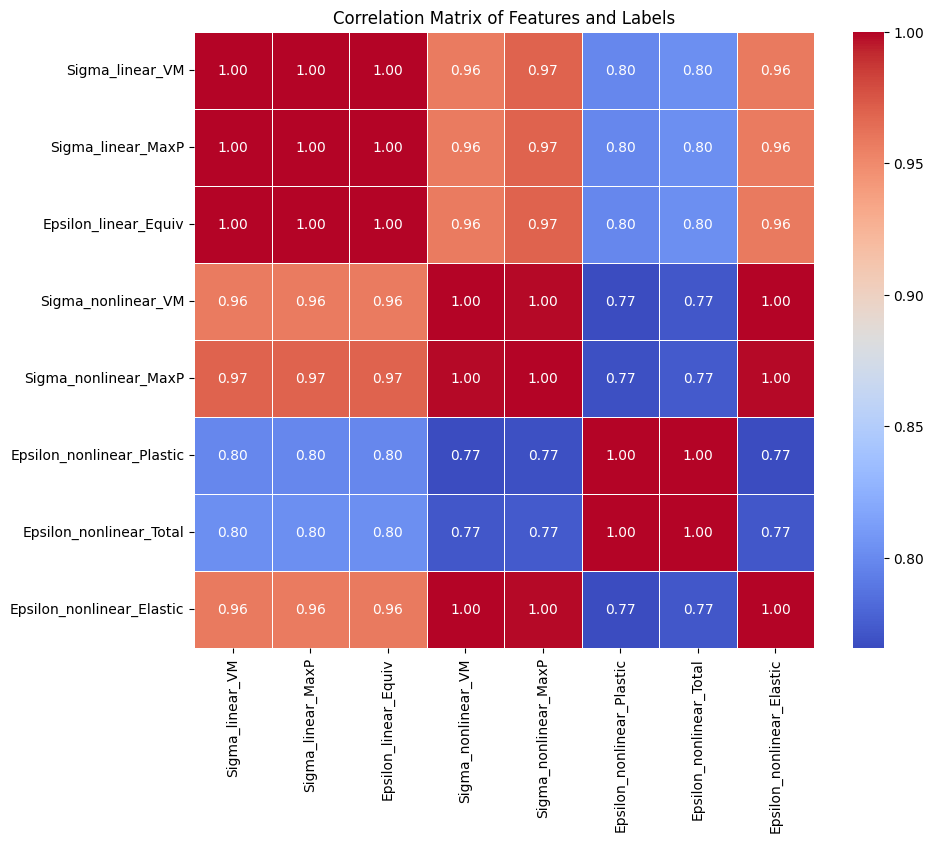

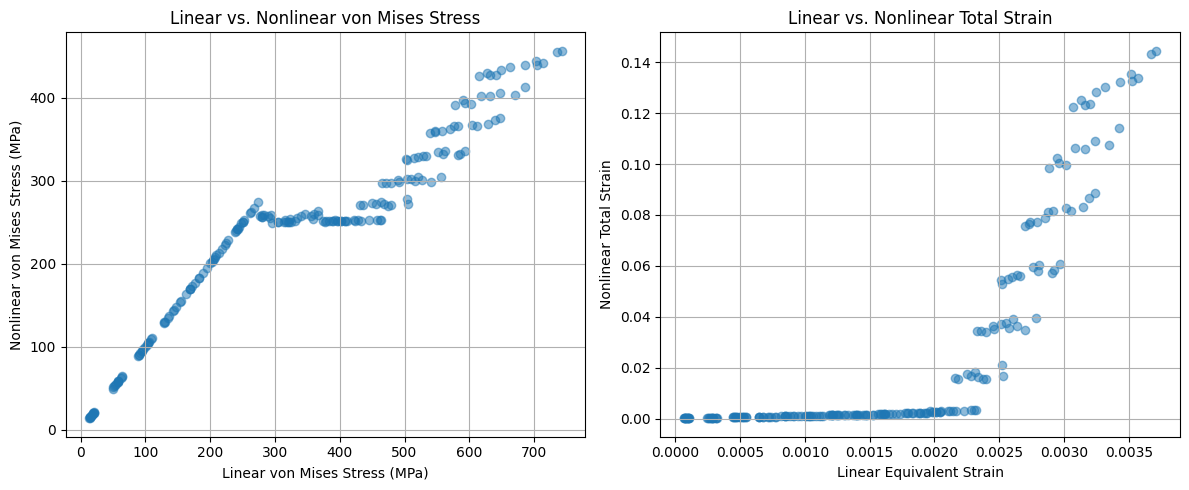

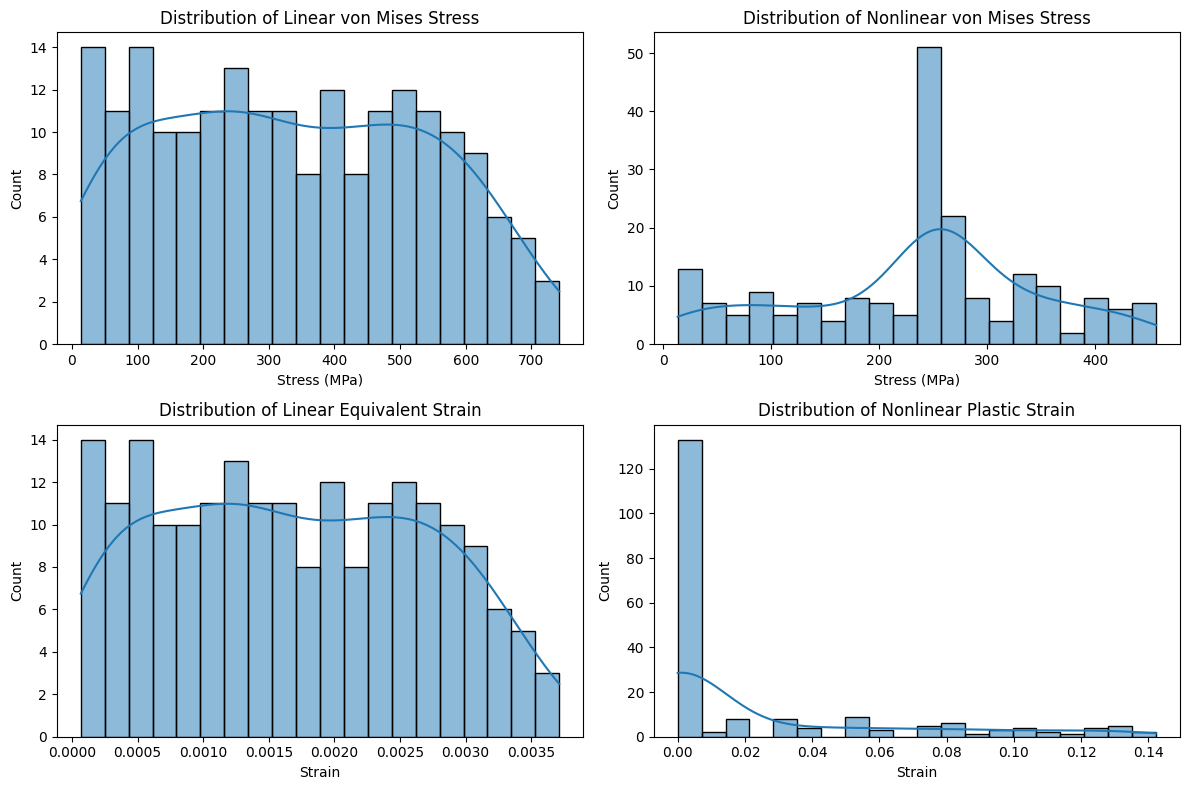

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into a single DataFrame for correlation analysis
data_combined = pd.concat([X, y], axis=1)

# Compute correlation matrix
correlation_matrix = data_combined.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Labels')
plt.show()

# Scatter plots: Linear vs. Nonlinear von Mises Stress and Total Strain
plt.figure(figsize=(12, 5))

# Subplot 1: Linear vs. Nonlinear von Mises Stress
plt.subplot(1, 2, 1)
plt.scatter(X['Sigma_linear_VM'], y['Sigma_nonlinear_VM'], alpha=0.5)
plt.xlabel('Linear von Mises Stress (MPa)')
plt.ylabel('Nonlinear von Mises Stress (MPa)')
plt.title('Linear vs. Nonlinear von Mises Stress')
plt.grid(True)

# Subplot 2: Linear vs. Nonlinear Total Strain
plt.subplot(1, 2, 2)
plt.scatter(X['Epsilon_linear_Equiv'], y['Epsilon_nonlinear_Total'], alpha=0.5)
plt.xlabel('Linear Equivalent Strain')
plt.ylabel('Nonlinear Total Strain')
plt.title('Linear vs. Nonlinear Total Strain')
plt.grid(True)

plt.tight_layout()
plt.show()

# Distribution plots for key features and labels
plt.figure(figsize=(12, 8))

# Distribution of Linear von Mises Stress
plt.subplot(2, 2, 1)
sns.histplot(X['Sigma_linear_VM'], bins=20, kde=True)
plt.title('Distribution of Linear von Mises Stress')
plt.xlabel('Stress (MPa)')

# Distribution of Nonlinear von Mises Stress
plt.subplot(2, 2, 2)
sns.histplot(y['Sigma_nonlinear_VM'], bins=20, kde=True)
plt.title('Distribution of Nonlinear von Mises Stress')
plt.xlabel('Stress (MPa)')

# Distribution of Linear Equivalent Strain
plt.subplot(2, 2, 3)
sns.histplot(X['Epsilon_linear_Equiv'], bins=20, kde=True)
plt.title('Distribution of Linear Equivalent Strain')
plt.xlabel('Strain')

# Distribution of Nonlinear Plastic Strain
plt.subplot(2, 2, 4)
sns.histplot(y['Epsilon_nonlinear_Plastic'], bins=20, kde=True)
plt.title('Distribution of Nonlinear Plastic Strain')
plt.xlabel('Strain')

plt.tight_layout()
plt.show()

# Step 4: Hyperparameter Definition for Model Selection

In this step, we define hyperparameters for traditional ML models to predict nonlinear FEA results. We’ll focus on:
- **Random Forest Regressor**: A tree-based ensemble method, good for capturing nonlinear relationships.
- **XGBoost Regressor** (optional): A gradient-boosting model, included if `xgboost` is available.

Since we’re using `MultiOutputRegressor`, hyperparameters for the underlying estimator must be prefixed with `estimator__` (e.g., `estimator__n_estimators`). We define these for tuning with `RandomizedSearchCV`.

In [5]:
!pip show xgboost

Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\nmanh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Try to import XGBoost, set flag if unavailable
try:
    from xgboost import XGBRegressor
    print("XGBoost imported successfully!")
    xgboost_available = True
except ImportError:
    print("XGBoost not found. Proceeding with Random Forest only.")
    xgboost_available = False

"""
# Define hyperparameters for Random Forest with 'estimator__' prefix for MultiOutputRegressor
rf_params = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__random_state': [42]
}
"""
# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}


"""
# Define hyperparameters for XGBoost with 'estimator__' prefix (if available) for MultiOutputRegressor
if xgboost_available:
    xgb_params = {
        'estimator__n_estimators': [100, 200, 300],
        'estimator__max_depth': [3, 5, 7],
        'estimator__learning_rate': [0.01, 0.1, 0.3],
        'estimator__subsample': [0.7, 0.9, 1.0],
        'estimator__colsample_bytree': [0.7, 0.9, 1.0],
        'estimator__random_state': [42]
    }
"""

# Define hyperparameters for XGBoost
if xgboost_available:
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'random_state': [42]
    }


# Print defined hyperparameters
print("Random Forest Hyperparameters:", rf_params)
if xgboost_available:
    print("XGBoost Hyperparameters:", xgb_params)

XGBoost imported successfully!
Random Forest Hyperparameters: {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'random_state': [42]}
XGBoost Hyperparameters: {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3], 'subsample': [0.7, 0.9, 1.0], 'colsample_bytree': [0.7, 0.9, 1.0], 'random_state': [42]}


# Step 4.5: Model Selection

In this step, we select and train the models using the defined hyperparameters. We’ll:
- Use RandomizedSearchCV to test hyperparameter combinations for Random Forest (and XGBoost if available).
- Train on the training data (X_train, y_train) from Step 2.
- Evaluate initial performance on the test set using mean squared error (MSE) and R² score.
- Hyperparameters are prefixed with `estimator__` to work with `MultiOutputRegressor`. If XGBoost isn’t available, we’ll focus on Random Forest.

The best model will be chosen based on test set performance.

In [26]:
# Import libraries for model selection and evaluation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and set up Random Forest

rf_base = RandomForestRegressor(random_state=42)
#rf_multi = MultiOutputRegressor(rf_base)

# Perform Randomized Search for RF
rf_search = RandomizedSearchCV(
    rf_base, 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)

#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train_np, y_train_np)

#xgb_model = XGBRegressor(n_estimators=100, random_state=42)
#xgb_model.fit(X_train_np, y_train_np)


# Train Random Forest
print("Training Random Forest...")
rf_search.fit(X_train, y_train)

# Handle XGBoost if available
if xgboost_available:
    # Initialize XGBoost
    xgb_base = XGBRegressor(random_state=42)

    # Perform Randomized Search for XGBoost
    xgb_search = RandomizedSearchCV(
        xgb_base, 
        param_distributions=xgb_params, 
        n_iter=10, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        random_state=42, 
        n_jobs=-1
    )
    
    print("Training XGBoost...")
  # Train XGBoost
    xgb_search.fit(X_train, y_train)
  
    # Get best XGBoost model and predict
    best_xgb = xgb_search.best_estimator_
    xgb_pred = best_xgb.predict(X_test)
   
    # Evaluate XGBoost
    xgb_mse = mean_squared_error(y_test, xgb_pred)
    xgb_r2 = r2_score(y_test, xgb_pred)

# Get best Random Forest model and predict
best_rf = rf_search.best_estimator_
rf_pred = best_rf.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print results
print("\nRandom Forest Best Params:", rf_search.best_params_)
print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)

if xgboost_available:
    print("\nXGBoost Best Params:", xgb_search.best_params_)
    print("XGBoost MSE:", xgb_mse)
    print("XGBoost R²:", xgb_r2)

Training Random Forest...
Training XGBoost...

Random Forest Best Params: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest MSE: 0.025278849610796628
Random Forest R²: 0.968378967425102

XGBoost Best Params: {'subsample': 0.7, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
XGBoost MSE: 0.027190768088756055
XGBoost R²: 0.9662438730069656


# Add 2 simple model without using RandomSearchCV


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Split data (70-15-15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert tensors back to NumPy for compatibility
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy()

### 🔹 **1. Simple RF & XGB Models**
# Train simple Random Forest
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X_train_np, y_train_np)

# Train simple XGBoost
xgb_simple = XGBRegressor(n_estimators=100, random_state=42)
xgb_simple.fit(X_train_np, y_train_np)

# Predictions for simple models
rf_simple_pred = rf_simple.predict(X_test_np)
xgb_simple_pred = xgb_simple.predict(X_test_np)

# Evaluation for simple models
rf_simple_mse = mean_squared_error(y_test_np, rf_simple_pred)
rf_simple_r2 = r2_score(y_test_np, rf_simple_pred)
xgb_simple_mse = mean_squared_error(y_test_np, xgb_simple_pred)
xgb_simple_r2 = r2_score(y_test_np, xgb_simple_pred)

### 🔹 **2. RandomizedSearchCV for RF & XGB**
# Hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform Randomized Search for RF
rf_search = RandomizedSearchCV(
    RandomForestRegressor(), 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)

print("Training Random Forest with RandomizedSearchCV...")
rf_search.fit(X_train_np, y_train_np)

# Train XGBoost if available
if xgboost_available:
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'random_state': [42]
    }

    xgb_search = RandomizedSearchCV(
        XGBRegressor(), 
        param_distributions=xgb_params, 
        n_iter=10, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        random_state=42, 
        n_jobs=-1
    )

    print("Training XGBoost with RandomizedSearchCV...")
    xgb_search.fit(X_train_np, y_train_np)

# Predictions for optimized models
best_rf = rf_search.best_estimator_
rf_pred = best_rf.predict(X_test_np)

if xgboost_available:
    best_xgb = xgb_search.best_estimator_
    xgb_pred = best_xgb.predict(X_test_np)

# Evaluate optimized models
rf_mse = mean_squared_error(y_test_np, rf_pred)
rf_r2 = r2_score(y_test_np, rf_pred)

if xgboost_available:
    xgb_mse = mean_squared_error(y_test_np, xgb_pred)
    xgb_r2 = r2_score(y_test_np, xgb_pred)

# Print results
print("\n📌 **Simple Random Forest Model:**")
print("MSE:", rf_simple_mse, " | R²:", rf_simple_r2)

print("\n📌 **Optimized Random Forest Model:**")
print("Best Params:", rf_search.best_params_)
print("MSE:", rf_mse, " | R²:", rf_r2)

if xgboost_available:
    print("\n📌 **Simple XGBoost Model:**")
    print("MSE:", xgb_simple_mse, " | R²:", xgb_simple_r2)

    print("\n📌 **Optimized XGBoost Model:**")
    print("Best Params:", xgb_search.best_params_)
    print("MSE:", xgb_mse, " | R²:", xgb_r2)


Training Random Forest with RandomizedSearchCV...
Training XGBoost with RandomizedSearchCV...

📌 **Simple Random Forest Model:**
MSE: 0.03378535178983954  | R²: 0.9590132504118782

📌 **Optimized Random Forest Model:**
Best Params: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
MSE: 0.02638615874171083  | R²: 0.968022280933682

📌 **Simple XGBoost Model:**
MSE: 0.037385981529951096  | R²: 0.9548945426940918

📌 **Optimized XGBoost Model:**
Best Params: {'subsample': 0.7, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
MSE: 0.029811451211571693  | R²: 0.9642176628112793


# Step 4.6:Learning Curve (Train vs. Validation Error)

**We can use sklearn.model_selection.learning_curve to visualize model performance across different training sizes.**

📈 Plotting Learning Curve for Simple Random Forest...


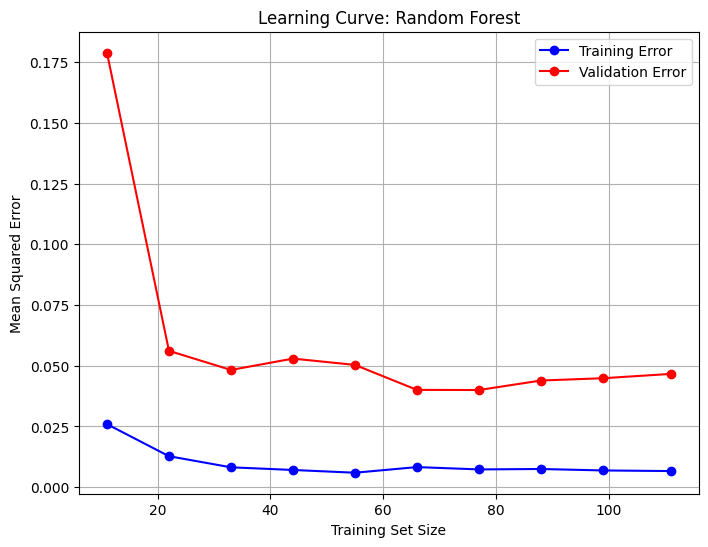

📈 Plotting Learning Curve for Simple XGBoost...


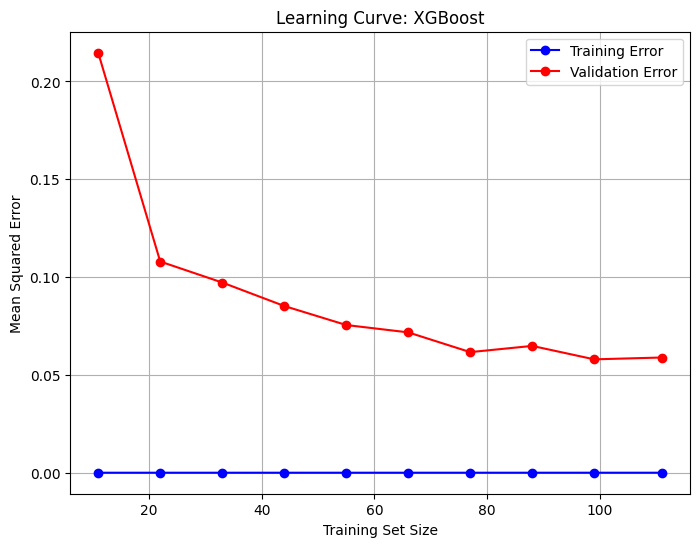

Training Random Forest with RandomizedSearchCV...
Training XGBoost with RandomizedSearchCV...

📌 **Simple Random Forest Model:**
MSE: 0.03378535178983954  | R²: 0.9590132504118782

📌 **Optimized Random Forest Model:**
Best Params: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
MSE: 0.02638615874171083  | R²: 0.968022280933682

📌 **Simple XGBoost Model:**
MSE: 0.037385981529951096  | R²: 0.9548945426940918

📌 **Optimized XGBoost Model:**
Best Params: {'subsample': 0.7, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
MSE: 0.029811451211571693  | R²: 0.9642176628112793
📈 Plotting Learning Curve for Optimized Random Forest...


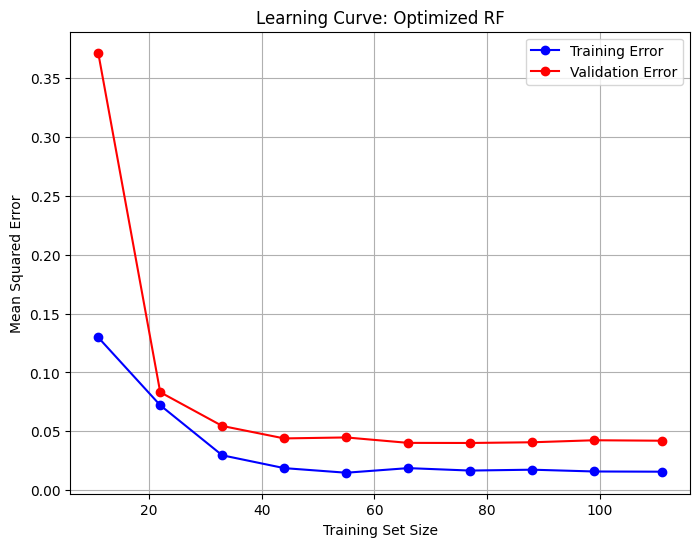

📈 Plotting Learning Curve for Optimized XGBoost...


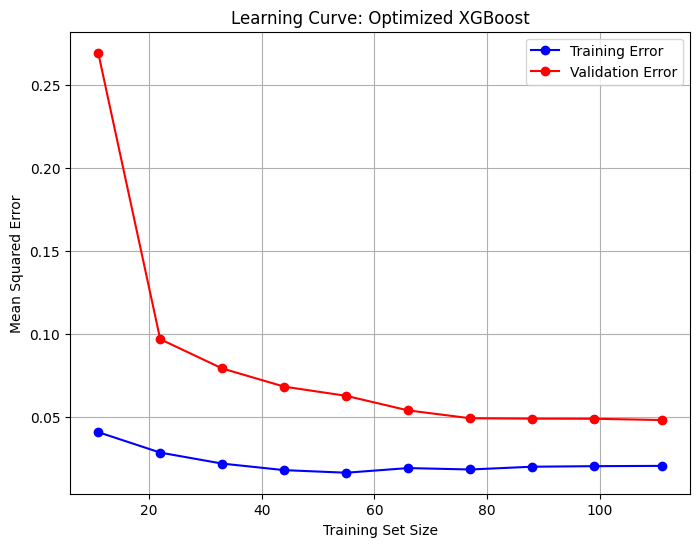

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Split data (70-15-15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert tensors back to NumPy for compatibility
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy()

### 🔹 **1. Train Simple RF & XGB Models**
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X_train_np, y_train_np)

xgb_simple = XGBRegressor(n_estimators=100, random_state=42)
xgb_simple.fit(X_train_np, y_train_np)

### 🔹 **2. Learning Curve Function**
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_errors = -np.mean(train_scores, axis=1)  # Convert neg MSE to positive
    val_errors = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, "o-", color="blue", label="Training Error")
    plt.plot(train_sizes, val_errors, "o-", color="red", label="Validation Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot Learning Curves
print("📈 Plotting Learning Curve for Simple Random Forest...")
plot_learning_curve(rf_simple, X_train_np, y_train_np, "Learning Curve: Random Forest")

print("📈 Plotting Learning Curve for Simple XGBoost...")
plot_learning_curve(xgb_simple, X_train_np, y_train_np, "Learning Curve: XGBoost")

### 🔹 **3. Hyperparameter Optimization Using RandomizedSearchCV**
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(), 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)

print("Training Random Forest with RandomizedSearchCV...")
rf_search.fit(X_train_np, y_train_np)

if xgboost_available:
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'random_state': [42]
    }

    xgb_search = RandomizedSearchCV(
        XGBRegressor(), 
        param_distributions=xgb_params, 
        n_iter=10, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        random_state=42, 
        n_jobs=-1
    )

    print("Training XGBoost with RandomizedSearchCV...")
    xgb_search.fit(X_train_np, y_train_np)

# Predictions for optimized models
best_rf = rf_search.best_estimator_
rf_pred = best_rf.predict(X_test_np)

if xgboost_available:
    best_xgb = xgb_search.best_estimator_
    xgb_pred = best_xgb.predict(X_test_np)

# Evaluate optimized models
rf_mse = mean_squared_error(y_test_np, rf_pred)
rf_r2 = r2_score(y_test_np, rf_pred)

if xgboost_available:
    xgb_mse = mean_squared_error(y_test_np, xgb_pred)
    xgb_r2 = r2_score(y_test_np, xgb_pred)

# Print results
print("\n📌 **Simple Random Forest Model:**")
print("MSE:", mean_squared_error(y_test_np, rf_simple.predict(X_test_np)), " | R²:", r2_score(y_test_np, rf_simple.predict(X_test_np)))

print("\n📌 **Optimized Random Forest Model:**")
print("Best Params:", rf_search.best_params_)
print("MSE:", rf_mse, " | R²:", rf_r2)

if xgboost_available:
    print("\n📌 **Simple XGBoost Model:**")
    print("MSE:", mean_squared_error(y_test_np, xgb_simple.predict(X_test_np)), " | R²:", r2_score(y_test_np, xgb_simple.predict(X_test_np)))

    print("\n📌 **Optimized XGBoost Model:**")
    print("Best Params:", xgb_search.best_params_)
    print("MSE:", xgb_mse, " | R²:", xgb_r2)

    # Plot Learning Curves for Optimized Models
    print("📈 Plotting Learning Curve for Optimized Random Forest...")
    plot_learning_curve(best_rf, X_train_np, y_train_np, "Learning Curve: Optimized RF")

    print("📈 Plotting Learning Curve for Optimized XGBoost...")
    plot_learning_curve(best_xgb, X_train_np, y_train_np, "Learning Curve: Optimized XGBoost")


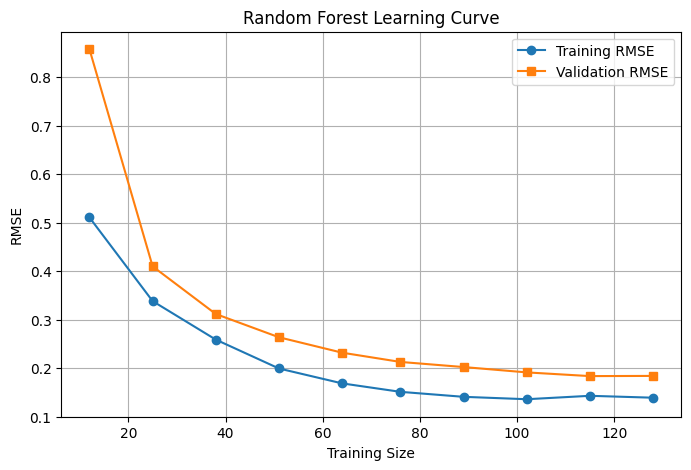

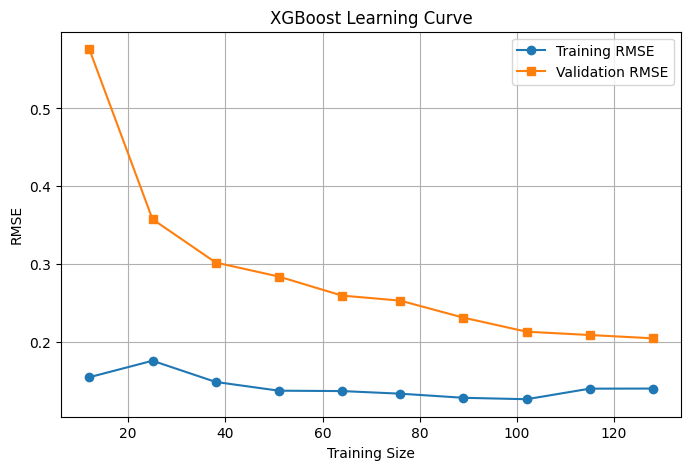

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Convert negative MSE to positive RMSE
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker="o")
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker="s")
    plt.xlabel("Training Size")
    plt.ylabel("RMSE")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(best_rf, X_train, y_train, title="Random Forest Learning Curve")

if xgboost_available:
    plot_learning_curve(best_xgb, X_train, y_train, title="XGBoost Learning Curve")


# Step 4.7: Track Performance During Hyperparameter Search

**Since `RandomizedSearchCV` does not store intermediate performance, we can manually track and visualize MSE for each hyperparameter set.**

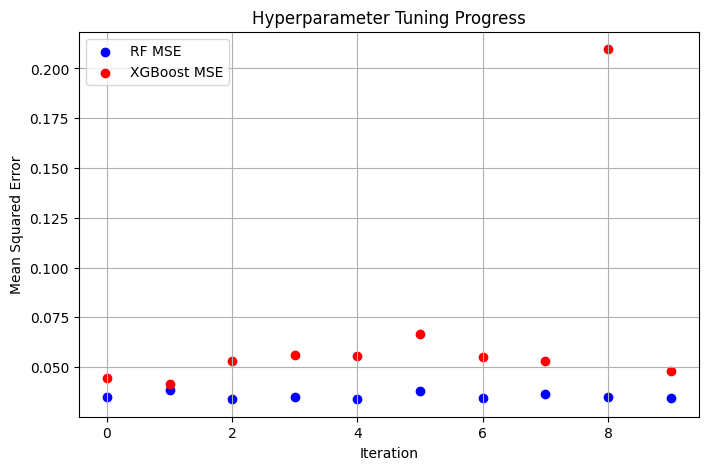

In [28]:
results_rf = rf_search.cv_results_
results_xgb = xgb_search.cv_results_ if xgboost_available else None

# Plot Random Forest Hyperparameter Search Progress
plt.figure(figsize=(8, 5))
plt.scatter(range(len(results_rf['mean_test_score'])), -results_rf['mean_test_score'], label="RF MSE", color="blue")
if xgboost_available:
    plt.scatter(range(len(results_xgb['mean_test_score'])), -results_xgb['mean_test_score'], label="XGBoost MSE", color="red")

plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Hyperparameter Tuning Progress")
plt.legend()
plt.grid()
plt.show()


# Step 4.8: Feature Importance for RF & XGBoost

**Both models provide feature importances.**

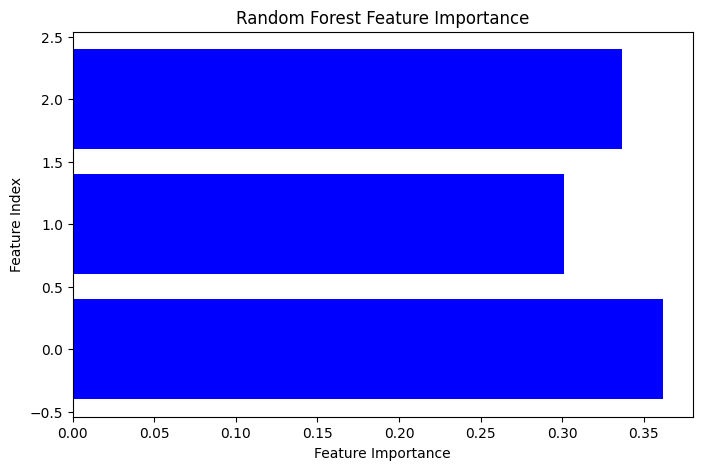

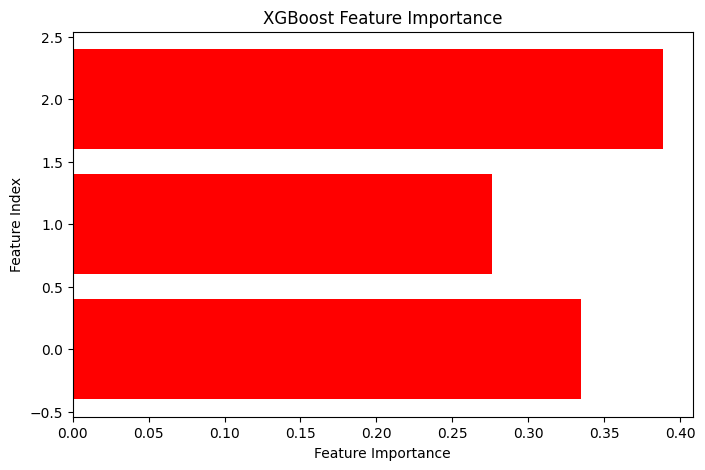

In [29]:
# Feature importance for Random Forest
plt.figure(figsize=(8, 5))
plt.barh(range(len(best_rf.feature_importances_)), best_rf.feature_importances_, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Random Forest Feature Importance")
plt.show()

# Feature importance for XGBoost (if available)
if xgboost_available:
    plt.figure(figsize=(8, 5))
    plt.barh(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_, color="red")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Index")
    plt.title("XGBoost Feature Importance")
    plt.show()


# Step 5: Model Evaluation and Refinement

In this step, we evaluate the trained Random Forest and XGBoost models:
- **Inverse Transform Predictions**: Convert scaled predictions back to original units (e.g., MPa for stress, strain units) using the scaler from Step 2.
- **Per-Output Metrics**: Calculate MSE and R² for each output (e.g., `Sigma_nonlinear_VM`, `Epsilon_nonlinear_Plastic`) to see which predictions are strongest.
- **Visualization**: Plot predicted vs. actual values for key outputs.
- **Refinement**: Decide if we need more tuning (e.g., increase `n_iter`, adjust params) or pick a final model.

We’ll focus on Random Forest given its slight edge, but compare with XGBoost for completeness.


Random Forest Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=168.0420, R²=0.9860
Sigma_nonlinear_MaxP: MSE=159.0645, R²=0.9903
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9394
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9400
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9862

XGBoost Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=197.4414, R²=0.9835
Sigma_nonlinear_MaxP: MSE=206.7703, R²=0.9874
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9373
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9391
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9839


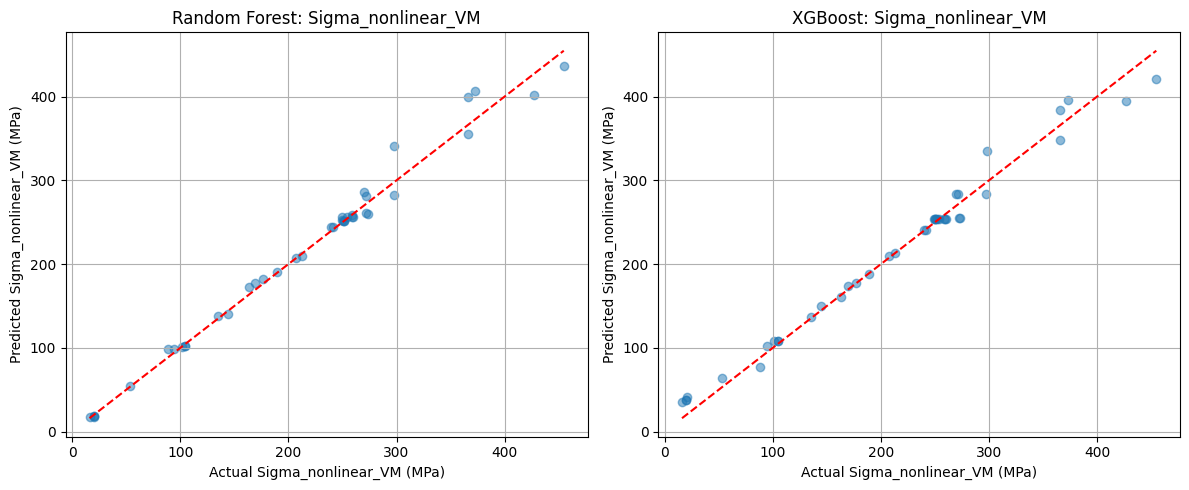

In [30]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Inverse transform predictions and test data
y_test_original = scaler_y.inverse_transform(y_test)
rf_pred_original = scaler_y.inverse_transform(rf_pred)
if xgboost_available:
    xgb_pred_original = scaler_y.inverse_transform(xgb_pred)

# Calculate per-output MSE and R² for Random Forest
rf_mse_per_output = mean_squared_error(y_test_original, rf_pred_original, multioutput='raw_values')
rf_r2_per_output = r2_score(y_test_original, rf_pred_original, multioutput='raw_values')

# Same for XGBoost if available
if xgboost_available:
    xgb_mse_per_output = mean_squared_error(y_test_original, xgb_pred_original, multioutput='raw_values')
    xgb_r2_per_output = r2_score(y_test_original, xgb_pred_original, multioutput='raw_values')

# Print per-output results
print("\nRandom Forest Per-Output Metrics (Original Units):")
for i, col in enumerate(y.columns):
    print(f"{col}: MSE={rf_mse_per_output[i]:.4f}, R²={rf_r2_per_output[i]:.4f}")

if xgboost_available:
    print("\nXGBoost Per-Output Metrics (Original Units):")
    for i, col in enumerate(y.columns):
        print(f"{col}: MSE={xgb_mse_per_output[i]:.4f}, R²={xgb_r2_per_output[i]:.4f}")

# Visualization: Predicted vs Actual for a key output (e.g., Sigma_nonlinear_VM)
plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test_original[:, 0], rf_pred_original[:, 0], alpha=0.5)
plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
         [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'r--')
plt.xlabel('Actual Sigma_nonlinear_VM (MPa)')
plt.ylabel('Predicted Sigma_nonlinear_VM (MPa)')
plt.title('Random Forest: Sigma_nonlinear_VM')
plt.grid(True)

# XGBoost (if available)
if xgboost_available:
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_original[:, 0], xgb_pred_original[:, 0], alpha=0.5)
    plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
             [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'r--')
    plt.xlabel('Actual Sigma_nonlinear_VM (MPa)')
    plt.ylabel('Predicted Sigma_nonlinear_VM (MPa)')
    plt.title('XGBoost: Sigma_nonlinear_VM')
    plt.grid(True)

plt.tight_layout()
plt.show()


Random Forest Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=165.1477, R²=0.9862
Sigma_nonlinear_MaxP: MSE=151.6534, R²=0.9907
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9383
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9387
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9865

XGBoost Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=198.8987, R²=0.9834
Sigma_nonlinear_MaxP: MSE=211.5995, R²=0.9871
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9381
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9386
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9836


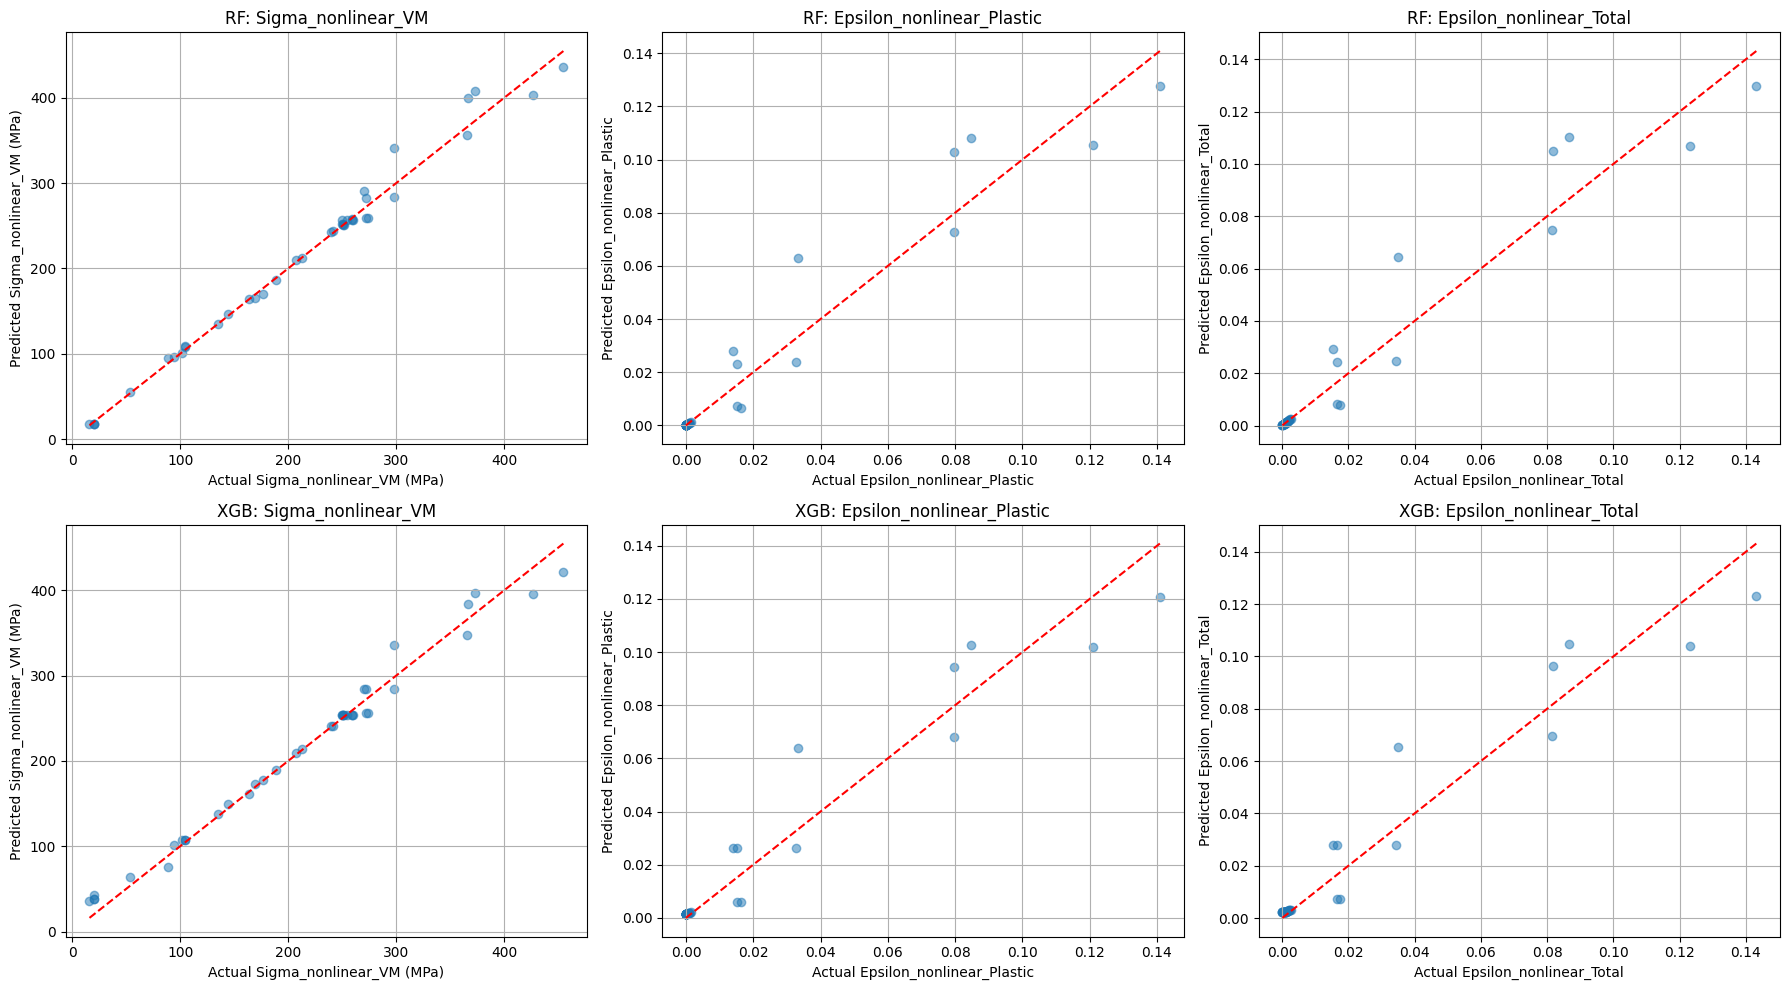

In [14]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Inverse transform predictions and test data
y_test_original = scaler_y.inverse_transform(y_test)
rf_pred_original = scaler_y.inverse_transform(rf_pred)
if xgboost_available:
    xgb_pred_original = scaler_y.inverse_transform(xgb_pred)

# Calculate per-output MSE and R² for Random Forest
rf_mse_per_output = mean_squared_error(y_test_original, rf_pred_original, multioutput='raw_values')
rf_r2_per_output = r2_score(y_test_original, rf_pred_original, multioutput='raw_values')

# Same for XGBoost if available
if xgboost_available:
    xgb_mse_per_output = mean_squared_error(y_test_original, xgb_pred_original, multioutput='raw_values')
    xgb_r2_per_output = r2_score(y_test_original, xgb_pred_original, multioutput='raw_values')

# Print per-output results
print("\nRandom Forest Per-Output Metrics (Original Units):")
for i, col in enumerate(y.columns):
    print(f"{col}: MSE={rf_mse_per_output[i]:.4f}, R²={rf_r2_per_output[i]:.4f}")

if xgboost_available:
    print("\nXGBoost Per-Output Metrics (Original Units):")
    for i, col in enumerate(y.columns):
        print(f"{col}: MSE={xgb_mse_per_output[i]:.4f}, R²={xgb_r2_per_output[i]:.4f}")

# Visualization: Predicted vs Actual for Sigma_nonlinear_VM, Epsilon_nonlinear_Plastic, Epsilon_nonlinear_Total
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Random Forest Plots
# Sigma_nonlinear_VM (index 0)
axes[0, 0].scatter(y_test_original[:, 0], rf_pred_original[:, 0], alpha=0.5)
axes[0, 0].plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
                [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'r--')
axes[0, 0].set_xlabel('Actual Sigma_nonlinear_VM (MPa)')
axes[0, 0].set_ylabel('Predicted Sigma_nonlinear_VM (MPa)')
axes[0, 0].set_title('RF: Sigma_nonlinear_VM')
axes[0, 0].grid(True)

# Epsilon_nonlinear_Plastic (index 2)
axes[0, 1].scatter(y_test_original[:, 2], rf_pred_original[:, 2], alpha=0.5)
axes[0, 1].plot([y_test_original[:, 2].min(), y_test_original[:, 2].max()], 
                [y_test_original[:, 2].min(), y_test_original[:, 2].max()], 'r--')
axes[0, 1].set_xlabel('Actual Epsilon_nonlinear_Plastic')
axes[0, 1].set_ylabel('Predicted Epsilon_nonlinear_Plastic')
axes[0, 1].set_title('RF: Epsilon_nonlinear_Plastic')
axes[0, 1].grid(True)

# Epsilon_nonlinear_Total (index 3)
axes[0, 2].scatter(y_test_original[:, 3], rf_pred_original[:, 3], alpha=0.5)
axes[0, 2].plot([y_test_original[:, 3].min(), y_test_original[:, 3].max()], 
                [y_test_original[:, 3].min(), y_test_original[:, 3].max()], 'r--')
axes[0, 2].set_xlabel('Actual Epsilon_nonlinear_Total')
axes[0, 2].set_ylabel('Predicted Epsilon_nonlinear_Total')
axes[0, 2].set_title('RF: Epsilon_nonlinear_Total')
axes[0, 2].grid(True)

# XGBoost Plots (if available)
if xgboost_available:
    # Sigma_nonlinear_VM (index 0)
    axes[1, 0].scatter(y_test_original[:, 0], xgb_pred_original[:, 0], alpha=0.5)
    axes[1, 0].plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
                    [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'r--')
    axes[1, 0].set_xlabel('Actual Sigma_nonlinear_VM (MPa)')
    axes[1, 0].set_ylabel('Predicted Sigma_nonlinear_VM (MPa)')
    axes[1, 0].set_title('XGB: Sigma_nonlinear_VM')
    axes[1, 0].grid(True)

    # Epsilon_nonlinear_Plastic (index 2)
    axes[1, 1].scatter(y_test_original[:, 2], xgb_pred_original[:, 2], alpha=0.5)
    axes[1, 1].plot([y_test_original[:, 2].min(), y_test_original[:, 2].max()], 
                    [y_test_original[:, 2].min(), y_test_original[:, 2].max()], 'r--')
    axes[1, 1].set_xlabel('Actual Epsilon_nonlinear_Plastic')
    axes[1, 1].set_ylabel('Predicted Epsilon_nonlinear_Plastic')
    axes[1, 1].set_title('XGB: Epsilon_nonlinear_Plastic')
    axes[1, 1].grid(True)

    # Epsilon_nonlinear_Total (index 3)
    axes[1, 2].scatter(y_test_original[:, 3], xgb_pred_original[:, 3], alpha=0.5)
    axes[1, 2].plot([y_test_original[:, 3].min(), y_test_original[:, 3].max()], 
                    [y_test_original[:, 3].min(), y_test_original[:, 3].max()], 'r--')
    axes[1, 2].set_xlabel('Actual Epsilon_nonlinear_Total')
    axes[1, 2].set_ylabel('Predicted Epsilon_nonlinear_Total')
    axes[1, 2].set_title('XGB: Epsilon_nonlinear_Total')
    axes[1, 2].grid(True)

plt.tight_layout()
plt.show()


📌 Simple RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=216.3396, R²=0.9830
Sigma_nonlinear_MaxP: MSE=188.3787, R²=0.9891
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9195
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9202
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9834

📌 Optimized RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=169.9898, R²=0.9866
Sigma_nonlinear_MaxP: MSE=153.4677, R²=0.9911
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9375
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9380
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9869

📌 Simple XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=251.1074, R²=0.9803
Sigma_nonlinear_MaxP: MSE=235.3735, R²=0.9864
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9799

📌 Optimized XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=208.7055, R²=0.9836
Sigma_nonlinear_MaxP: MSE=223.1420, R²=0.98

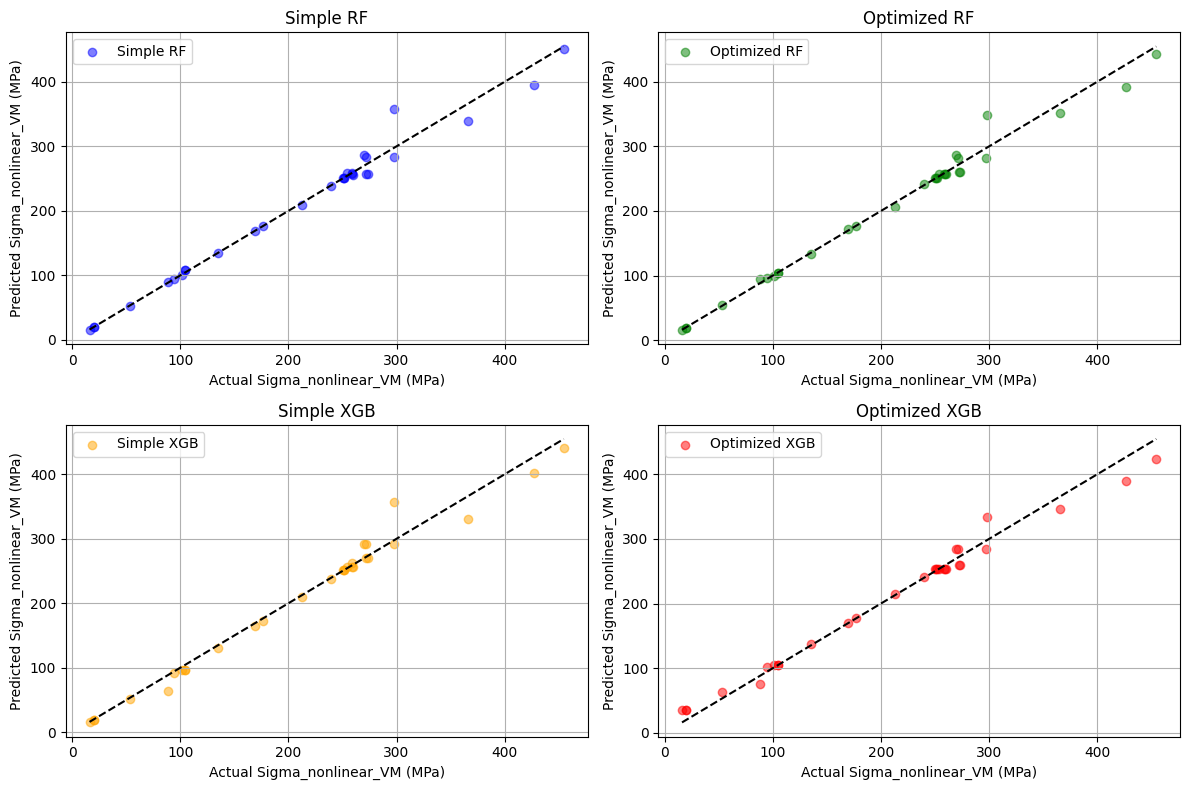

In [37]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize the cleaned data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Split into train, validation, and test sets (70-15-15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Train Simple Random Forest
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X_train, y_train)

# Train Simple XGBoost
xgb_simple = XGBRegressor(n_estimators=100, random_state=42)
xgb_simple.fit(X_train, y_train)

# Train Optimized Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(), 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
rf_optimized = rf_search.best_estimator_

# Train Optimized XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'random_state': [42]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(), 
    param_distributions=xgb_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
xgb_optimized = xgb_search.best_estimator_

# Predictions for all models
rf_simple_pred = rf_simple.predict(X_test)
xgb_simple_pred = xgb_simple.predict(X_test)
rf_optimized_pred = rf_optimized.predict(X_test)
xgb_optimized_pred = xgb_optimized.predict(X_test)

# Inverse transform predictions and test data
y_test_original = scaler_y.inverse_transform(y_test)
rf_simple_pred_original = scaler_y.inverse_transform(rf_simple_pred)
xgb_simple_pred_original = scaler_y.inverse_transform(xgb_simple_pred)
rf_optimized_pred_original = scaler_y.inverse_transform(rf_optimized_pred)
xgb_optimized_pred_original = scaler_y.inverse_transform(xgb_optimized_pred)

# Calculate per-output MSE and R² for all models
models = {
    "Simple RF": rf_simple_pred_original,
    "Optimized RF": rf_optimized_pred_original,
    "Simple XGB": xgb_simple_pred_original,
    "Optimized XGB": xgb_optimized_pred_original
}

for model_name, predictions in models.items():
    mse_per_output = mean_squared_error(y_test_original, predictions, multioutput='raw_values')
    r2_per_output = r2_score(y_test_original, predictions, multioutput='raw_values')

    print(f"\n📌 {model_name} Per-Output Metrics (Original Units):")
    for i, col in enumerate(y.columns):
        print(f"{col}: MSE={mse_per_output[i]:.4f}, R²={r2_per_output[i]:.4f}")

# Visualization: Predicted vs Actual for a key output (e.g., Sigma_nonlinear_VM)
plt.figure(figsize=(12, 8))

model_colors = {
    "Simple RF": "blue",
    "Optimized RF": "green",
    "Simple XGB": "orange",
    "Optimized XGB": "red"
}

for i, (model_name, predictions) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test_original[:, 0], predictions[:, 0], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
             [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'k--')
    plt.xlabel('Actual Sigma_nonlinear_VM (MPa)')
    plt.ylabel('Predicted Sigma_nonlinear_VM (MPa)')
    plt.title(model_name)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



📌 Simple RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=216.3396, R²=0.9830
Sigma_nonlinear_MaxP: MSE=188.3787, R²=0.9891
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9195
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9202
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9834

📌 Optimized RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=169.9898, R²=0.9866
Sigma_nonlinear_MaxP: MSE=153.4677, R²=0.9911
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9375
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9380
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9869

📌 Simple XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=251.1074, R²=0.9803
Sigma_nonlinear_MaxP: MSE=235.3735, R²=0.9864
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9799

📌 Optimized XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=208.7055, R²=0.9836
Sigma_nonlinear_MaxP: MSE=223.1420, R²=0.98

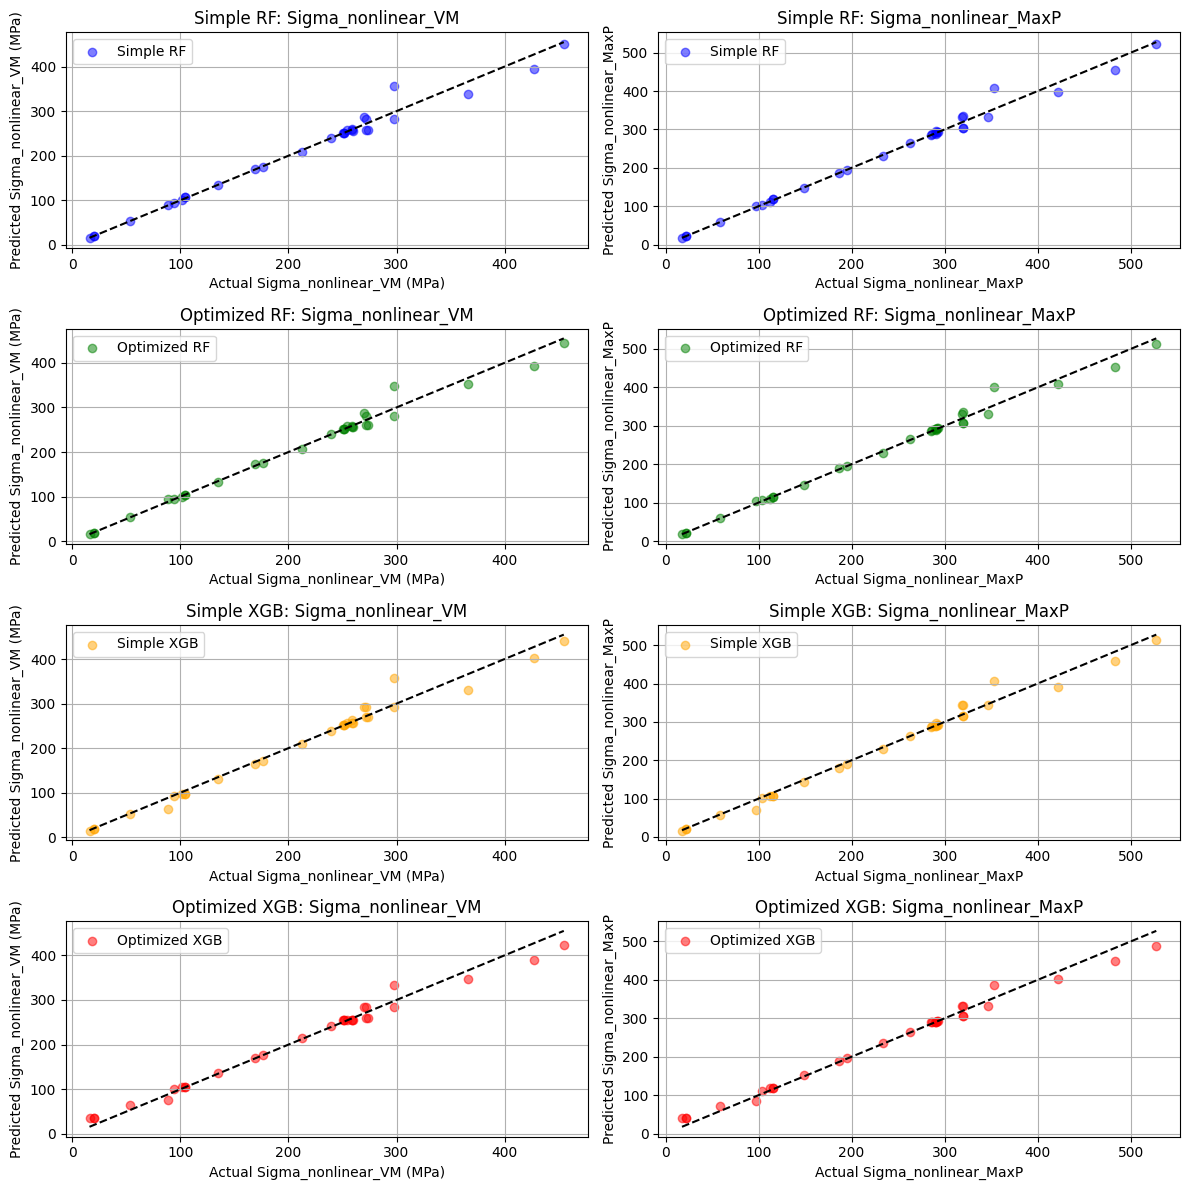

In [38]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize the cleaned data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Split into train, validation, and test sets (70-15-15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Train Simple Random Forest
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X_train, y_train)

# Train Simple XGBoost
xgb_simple = XGBRegressor(n_estimators=100, random_state=42)
xgb_simple.fit(X_train, y_train)

# Train Optimized Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(), 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
rf_optimized = rf_search.best_estimator_

# Train Optimized XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'random_state': [42]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(), 
    param_distributions=xgb_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
xgb_optimized = xgb_search.best_estimator_

# Predictions for all models
rf_simple_pred = rf_simple.predict(X_test)
xgb_simple_pred = xgb_simple.predict(X_test)
rf_optimized_pred = rf_optimized.predict(X_test)
xgb_optimized_pred = xgb_optimized.predict(X_test)

# Inverse transform predictions and test data
y_test_original = scaler_y.inverse_transform(y_test)
rf_simple_pred_original = scaler_y.inverse_transform(rf_simple_pred)
xgb_simple_pred_original = scaler_y.inverse_transform(xgb_simple_pred)
rf_optimized_pred_original = scaler_y.inverse_transform(rf_optimized_pred)
xgb_optimized_pred_original = scaler_y.inverse_transform(xgb_optimized_pred)

# Calculate per-output MSE and R² for all models
models = {
    "Simple RF": rf_simple_pred_original,
    "Optimized RF": rf_optimized_pred_original,
    "Simple XGB": xgb_simple_pred_original,
    "Optimized XGB": xgb_optimized_pred_original
}

for model_name, predictions in models.items():
    mse_per_output = mean_squared_error(y_test_original, predictions, multioutput='raw_values')
    r2_per_output = r2_score(y_test_original, predictions, multioutput='raw_values')

    print(f"\n📌 {model_name} Per-Output Metrics (Original Units):")
    for i, col in enumerate(y.columns):
        print(f"{col}: MSE={mse_per_output[i]:.4f}, R²={r2_per_output[i]:.4f}")

# Visualization: Predicted vs Actual for both Stress and Strain
plt.figure(figsize=(12, 12))

model_colors = {
    "Simple RF": "blue",
    "Optimized RF": "green",
    "Simple XGB": "orange",
    "Optimized XGB": "red"
}

output_names = list(y.columns)  # Assuming first column = Stress, second = Strain

for i, (model_name, predictions) in enumerate(models.items()):
    # Stress Plot (First Output)
    plt.subplot(4, 2, 2 * i + 1)
    plt.scatter(y_test_original[:, 0], predictions[:, 0], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
             [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'k--')
    plt.xlabel(f'Actual {output_names[0]} (MPa)')
    plt.ylabel(f'Predicted {output_names[0]} (MPa)')
    plt.title(f"{model_name}: {output_names[0]}")
    plt.legend()
    plt.grid(True)

    # Strain Plot (Second Output)
    plt.subplot(4, 2, 2 * i + 2)
    plt.scatter(y_test_original[:, 1], predictions[:, 1], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 1].min(), y_test_original[:, 1].max()], 
             [y_test_original[:, 1].min(), y_test_original[:, 1].max()], 'k--')
    plt.xlabel(f'Actual {output_names[1]}')
    plt.ylabel(f'Predicted {output_names[1]}')
    plt.title(f"{model_name}: {output_names[1]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



📌 Simple RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=216.3396, R²=0.9830
Sigma_nonlinear_MaxP: MSE=188.3787, R²=0.9891
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9195
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9202
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9834

📌 Optimized RF Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=169.9898, R²=0.9866
Sigma_nonlinear_MaxP: MSE=153.4677, R²=0.9911
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9375
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9380
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9869

📌 Simple XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=251.1074, R²=0.9803
Sigma_nonlinear_MaxP: MSE=235.3735, R²=0.9864
Epsilon_nonlinear_Plastic: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Total: MSE=0.0001, R²=0.9140
Epsilon_nonlinear_Elastic: MSE=0.0000, R²=0.9799

📌 Optimized XGB Per-Output Metrics (Original Units):
Sigma_nonlinear_VM: MSE=208.7055, R²=0.9836
Sigma_nonlinear_MaxP: MSE=223.1420, R²=0.98

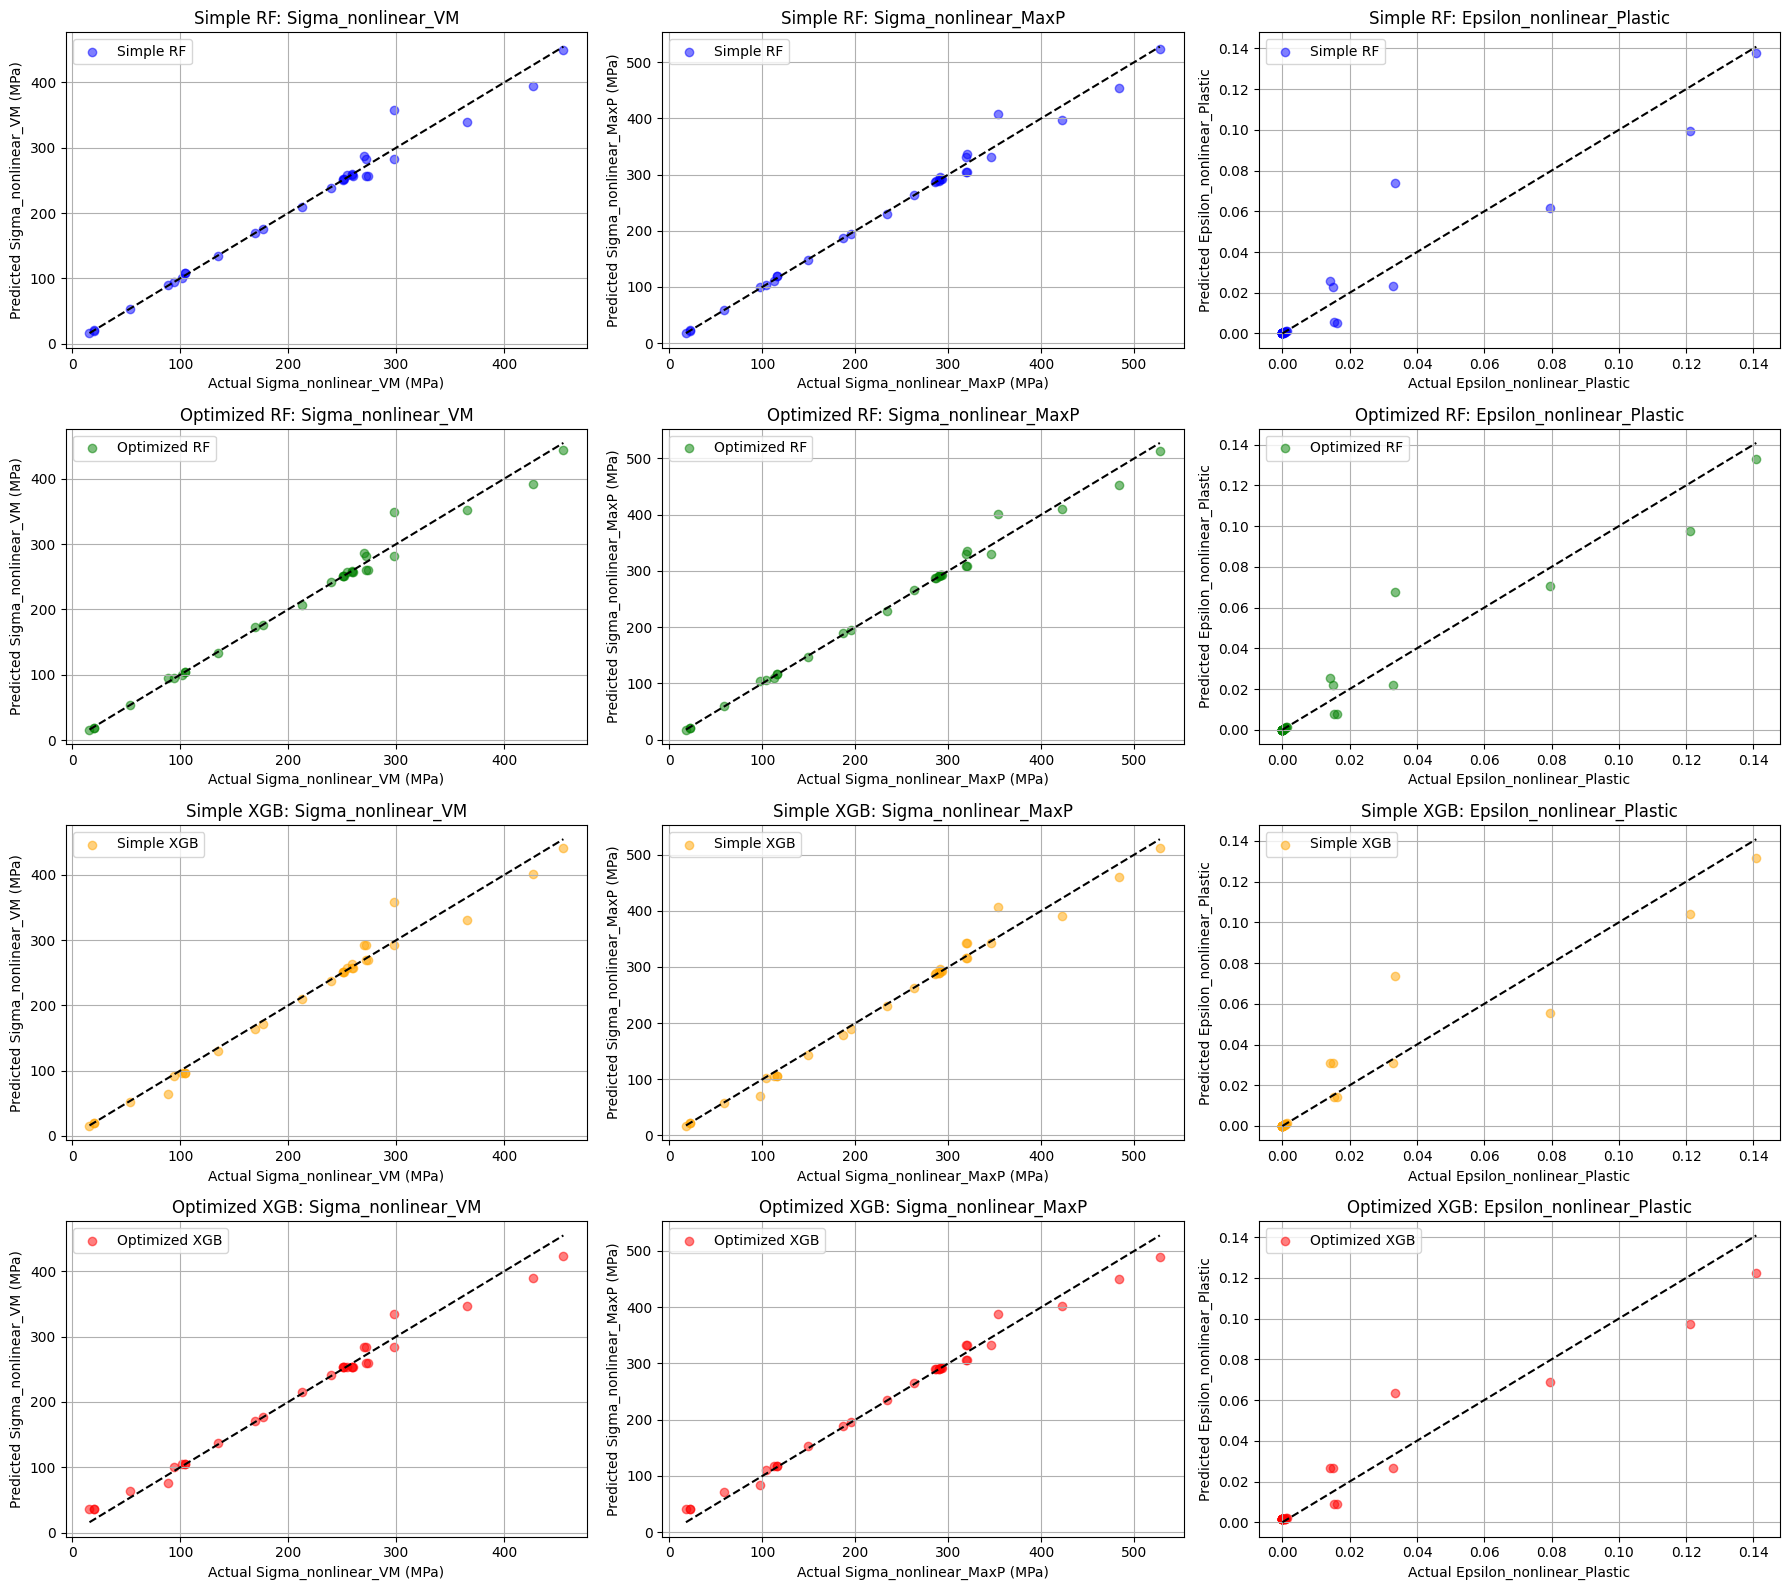

In [39]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize the cleaned data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_clean)
y_scaled = scaler_y.fit_transform(y_clean)

# Split into train, validation, and test sets (70-15-15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# Train Simple Random Forest
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X_train, y_train)

# Train Simple XGBoost
xgb_simple = XGBRegressor(n_estimators=100, random_state=42)
xgb_simple.fit(X_train, y_train)

# Train Optimized Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(), 
    param_distributions=rf_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
rf_optimized = rf_search.best_estimator_

# Train Optimized XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'random_state': [42]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(), 
    param_distributions=xgb_params, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
xgb_optimized = xgb_search.best_estimator_

# Predictions for all models
rf_simple_pred = rf_simple.predict(X_test)
xgb_simple_pred = xgb_simple.predict(X_test)
rf_optimized_pred = rf_optimized.predict(X_test)
xgb_optimized_pred = xgb_optimized.predict(X_test)

# Inverse transform predictions and test data
y_test_original = scaler_y.inverse_transform(y_test)
rf_simple_pred_original = scaler_y.inverse_transform(rf_simple_pred)
xgb_simple_pred_original = scaler_y.inverse_transform(xgb_simple_pred)
rf_optimized_pred_original = scaler_y.inverse_transform(rf_optimized_pred)
xgb_optimized_pred_original = scaler_y.inverse_transform(xgb_optimized_pred)

# Calculate per-output MSE and R² for all models
models = {
    "Simple RF": rf_simple_pred_original,
    "Optimized RF": rf_optimized_pred_original,
    "Simple XGB": xgb_simple_pred_original,
    "Optimized XGB": xgb_optimized_pred_original
}

for model_name, predictions in models.items():
    mse_per_output = mean_squared_error(y_test_original, predictions, multioutput='raw_values')
    r2_per_output = r2_score(y_test_original, predictions, multioutput='raw_values')

    print(f"\n📌 {model_name} Per-Output Metrics (Original Units):")
    for i, col in enumerate(y.columns):
        print(f"{col}: MSE={mse_per_output[i]:.4f}, R²={r2_per_output[i]:.4f}")

# Visualization: Predicted vs Actual for Sigma VM, Sigma MaxP, and Epsilon
plt.figure(figsize=(18, 16))

model_colors = {
    "Simple RF": "blue",
    "Optimized RF": "green",
    "Simple XGB": "orange",
    "Optimized XGB": "red"
}

output_names = list(y.columns)  # Assuming first column = Sigma VM, second = Sigma MaxP, third = Epsilon

for i, (model_name, predictions) in enumerate(models.items()):
    # Sigma VM Plot (First Output)
    plt.subplot(4, 3, 3 * i + 1)
    plt.scatter(y_test_original[:, 0], predictions[:, 0], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()], 
             [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'k--')
    plt.xlabel(f'Actual {output_names[0]} (MPa)')
    plt.ylabel(f'Predicted {output_names[0]} (MPa)')
    plt.title(f"{model_name}: {output_names[0]}")
    plt.legend()
    plt.grid(True)

    # Sigma MaxP Plot (Second Output)
    plt.subplot(4, 3, 3 * i + 2)
    plt.scatter(y_test_original[:, 1], predictions[:, 1], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 1].min(), y_test_original[:, 1].max()], 
             [y_test_original[:, 1].min(), y_test_original[:, 1].max()], 'k--')
    plt.xlabel(f'Actual {output_names[1]} (MPa)')
    plt.ylabel(f'Predicted {output_names[1]} (MPa)')
    plt.title(f"{model_name}: {output_names[1]}")
    plt.legend()
    plt.grid(True)

    # Epsilon (Strain) Plot (Third Output)
    plt.subplot(4, 3, 3 * i + 3)
    plt.scatter(y_test_original[:, 2], predictions[:, 2], alpha=0.5, color=model_colors[model_name], label=model_name)
    plt.plot([y_test_original[:, 2].min(), y_test_original[:, 2].max()], 
             [y_test_original[:, 2].min(), y_test_original[:, 2].max()], 'k--')
    plt.xlabel(f'Actual {output_names[2]}')
    plt.ylabel(f'Predicted {output_names[2]}')
    plt.title(f"{model_name}: {output_names[2]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# Step 5.5: Visualize Residual Plots

In this step, we create residual plots to analyze model errors for `Sigma_nonlinear_VM`, `Epsilon_nonlinear_Plastic`, and `Epsilon_nonlinear_Total`. Residuals are calculated as (actual - predicted) in **original units** (e.g., MPa for stress, unitless for strain) using inverse-transformed data from Step 5. We’ll:
- Plot residuals vs. actual values for Random Forest and XGBoost (if available).
- Look for patterns: Random scatter around zero is ideal; trends suggest model limitations.
- Use these insights to decide if further refinement is needed.

Residuals are already denormalized, ensuring errors are interpretable in physical units.

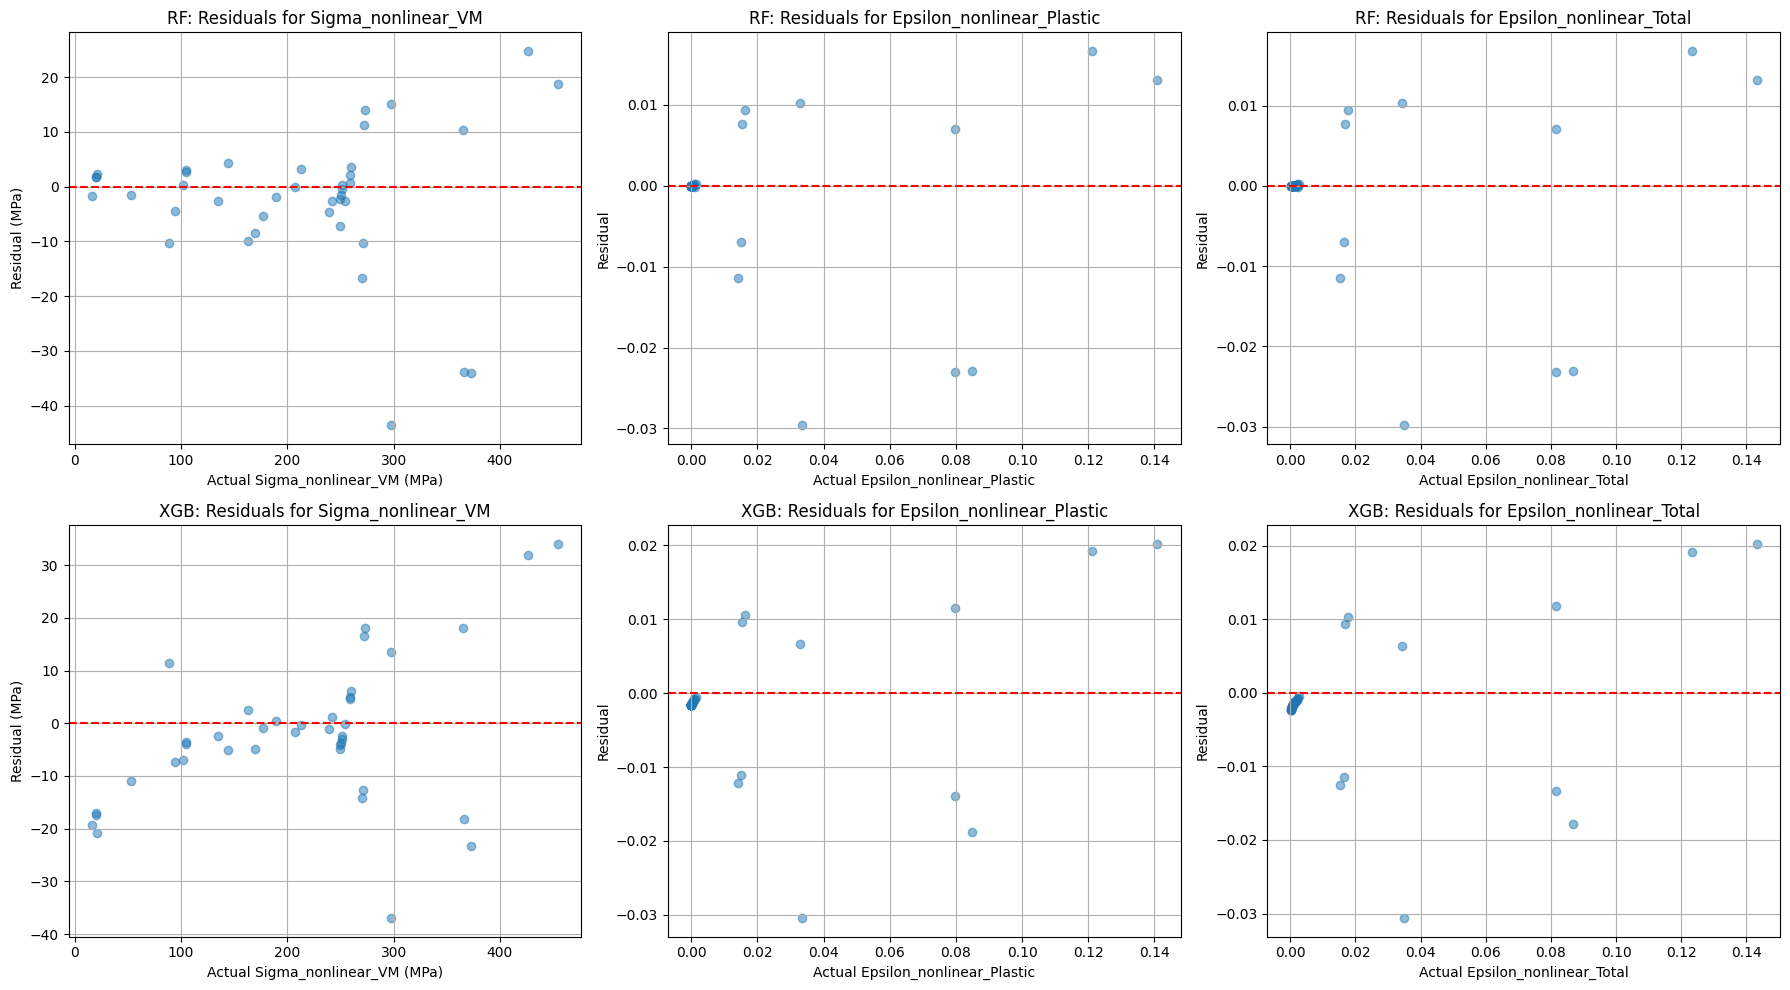

In [31]:
# Import libraries
import matplotlib.pyplot as plt

# Calculate residuals (actual - predicted) in original units from Step 5
# Note: y_test_original and rf_pred_original are already inverse-transformed (denormalized)
rf_residuals = y_test_original - rf_pred_original
if xgboost_available:
    xgb_residuals = y_test_original - xgb_pred_original

# Set up residual plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Random Forest Residual Plots
# Sigma_nonlinear_VM (index 0)
axes[0, 0].scatter(y_test_original[:, 0], rf_residuals[:, 0], alpha=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Actual Sigma_nonlinear_VM (MPa)')
axes[0, 0].set_ylabel('Residual (MPa)')
axes[0, 0].set_title('RF: Residuals for Sigma_nonlinear_VM')
axes[0, 0].grid(True)

# Epsilon_nonlinear_Plastic (index 2)
axes[0, 1].scatter(y_test_original[:, 2], rf_residuals[:, 2], alpha=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Actual Epsilon_nonlinear_Plastic')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].set_title('RF: Residuals for Epsilon_nonlinear_Plastic')
axes[0, 1].grid(True)

# Epsilon_nonlinear_Total (index 3)
axes[0, 2].scatter(y_test_original[:, 3], rf_residuals[:, 3], alpha=0.5)
axes[0, 2].axhline(0, color='red', linestyle='--')
axes[0, 2].set_xlabel('Actual Epsilon_nonlinear_Total')
axes[0, 2].set_ylabel('Residual')
axes[0, 2].set_title('RF: Residuals for Epsilon_nonlinear_Total')
axes[0, 2].grid(True)

# XGBoost Residual Plots (if available)
if xgboost_available:
    # Sigma_nonlinear_VM (index 0)
    axes[1, 0].scatter(y_test_original[:, 0], xgb_residuals[:, 0], alpha=0.5)
    axes[1, 0].axhline(0, color='red', linestyle='--')
    axes[1, 0].set_xlabel('Actual Sigma_nonlinear_VM (MPa)')
    axes[1, 0].set_ylabel('Residual (MPa)')
    axes[1, 0].set_title('XGB: Residuals for Sigma_nonlinear_VM')
    axes[1, 0].grid(True)

    # Epsilon_nonlinear_Plastic (index 2)
    axes[1, 1].scatter(y_test_original[:, 2], xgb_residuals[:, 2], alpha=0.5)
    axes[1, 1].axhline(0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('Actual Epsilon_nonlinear_Plastic')
    axes[1, 1].set_ylabel('Residual')
    axes[1, 1].set_title('XGB: Residuals for Epsilon_nonlinear_Plastic')
    axes[1, 1].grid(True)

    # Epsilon_nonlinear_Total (index 3)
    axes[1, 2].scatter(y_test_original[:, 3], xgb_residuals[:, 3], alpha=0.5)
    axes[1, 2].axhline(0, color='red', linestyle='--')
    axes[1, 2].set_xlabel('Actual Epsilon_nonlinear_Total')
    axes[1, 2].set_ylabel('Residual')
    axes[1, 2].set_title('XGB: Residuals for Epsilon_nonlinear_Total')
    axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Step 6: Evaluate Results

In this step, we summarize the performance of Random Forest and XGBoost based on previous metrics and visualizations:
- Compare overall MSE and R² from Step 4.5.
- Review per-output metrics from Step 5.
- Analyze residual patterns from Step 5.5.
- Decide which model to prioritize for deployment (Random Forest, XGBoost, or both).

This evaluation guides our final model selection and deployment strategy.

In [32]:
# Print summary of results from previous steps
print("Step 6: Model Evaluation Summary")

# Overall metrics from Step 4.5
print("\nOverall Performance (Scaled Units):")
print(f"Random Forest - MSE: {rf_mse:.6f}, R²: {rf_r2:.4f}")
if xgboost_available:
    print(f"XGBoost - MSE: {xgb_mse:.6f}, R²: {xgb_r2:.4f}")

# Per-output metrics from Step 5 (already printed, just referencing here)
print("\nPer-Output Metrics (Original Units):")
print("See Step 5 output for detailed MSE and R² per output.")

# Residual analysis (manual input expected from user based on Step 5.5 plots)
print("\nResidual Analysis:")
print("- Check Step 5.5 residual plots for patterns.")
print("- Random scatter around 0 = good fit.")
print("- Trends/curves = potential nonlinearity not captured.")
print("- Outliers = specific cases to investigate.")

# Model selection recommendation
print("\nRecommendation:")
if rf_r2 > xgb_r2:
    print("Random Forest slightly outperforms XGBoost (higher R², lower MSE).")
else:
    print("XGBoost slightly outperforms Random Forest (higher R², lower MSE).")
print("Both models are strong (R² > 96%). Deploying both in UI for flexibility.")

Step 6: Model Evaluation Summary

Overall Performance (Scaled Units):
Random Forest - MSE: 0.025279, R²: 0.9684
XGBoost - MSE: 0.027191, R²: 0.9662

Per-Output Metrics (Original Units):
See Step 5 output for detailed MSE and R² per output.

Residual Analysis:
- Check Step 5.5 residual plots for patterns.
- Random scatter around 0 = good fit.
- Trends/curves = potential nonlinearity not captured.
- Outliers = specific cases to investigate.

Recommendation:
Random Forest slightly outperforms XGBoost (higher R², lower MSE).
Both models are strong (R² > 96%). Deploying both in UI for flexibility.


# Step 7: Save Models

Here, we save the trained Random Forest and XGBoost models, along with their scalers, to disk using `joblib`. This allows us to reload them for deployment without retraining:
- Save `best_rf`, `best_xgb` (if available), `scaler_X`, and `scaler_y`.
- Files will be stored in the current directory for easy access in Step 8.

In [33]:
# Import joblib for saving
import joblib

# Save Random Forest model and scalers
joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Saved Random Forest model and scalers.")

# Save XGBoost model (if available)
if xgboost_available:
    joblib.dump(best_xgb, 'xgboost_model.pkl')
    print("Saved XGBoost model.")

Saved Random Forest model and scalers.
Saved XGBoost model.


In [40]:
# Import joblib for saving
import joblib

# Save all models
joblib.dump(rf_simple, 'random_forest_simple.pkl')
joblib.dump(rf_optimized, 'random_forest_optimized.pkl')
joblib.dump(xgb_simple, 'xgboost_simple.pkl')
joblib.dump(xgb_optimized, 'xgboost_optimized.pkl')

# Save scalers
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

print("✅ Saved all models and scalers successfully.")


✅ Saved all models and scalers successfully.


# Step 8: Deploy Integrated UI in Jupyter

In this step, we create an interactive UI within Jupyter using IPython widgets:
- **Inputs**: Linear FEA values (`Sigma_linear_VM`, `Sigma_linear_MaxP`, `Epsilon_linear_Equiv`).
- **Model Selection**: Dropdown to choose between Random Forest and XGBoost (if available).
- **Output**: Predicted nonlinear values in original units.
- **History Log**: Displays up to 10 recent predictions with a 'Clear Log' button.

The UI loads saved models and scalers, processes inputs, and shows results dynamically.

In [34]:
# Import libraries for UI and timestamp
from IPython.display import display, clear_output
import ipywidgets as widgets
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load saved models and scalers
best_rf = joblib.load('random_forest_model.pkl')
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')
xgboost_available = True  # Assume true if saved, adjust if not
if xgboost_available:
    try:
        best_xgb = joblib.load('xgboost_model.pkl')
    except:
        xgboost_available = False
        print("XGBoost model not found. UI will use Random Forest only.")

# Define feature names (must match Step 1 X columns)
feature_names = ['Sigma_linear_VM', 'Sigma_linear_MaxP', 'Epsilon_linear_Equiv']

# Initialize history log (list to store up to 10 entries)
history_log = []

# Create input widgets with demo values
equiv_von_mises_stress = widgets.FloatText(
    value=340.1523409,
    description='Linear results: Equivalent (Von Mises) stress (MPa):',
    layout={'width': '500px'},
    style={'description_width': '200px'}
)
max_principal_stress = widgets.FloatText(
    value=376.1708725,
    description='Maximum Principal stress (MPa):',
    layout={'width': '500px'},
    style={'description_width': '200px'}
)
equiv_strain = widgets.FloatText(
    value=0.001700776,
    description='Equivalent strain (mm / mm):',
    layout={'width': '500px'},
    style={'description_width': '200px'}
)

# Model selection dropdown
model_choice = widgets.Dropdown(
    options=['Random Forest', 'XGBoost'] if xgboost_available else ['Random Forest'],
    value='Random Forest',
    description='Model:',
    layout={'width': '500px'},
    style={'description_width': '200px'}
)

# Create output widget
output = widgets.Output()

# Create history log display
history_output = widgets.Output()

# Clear log button
clear_button = widgets.Button(description='Clear Log')

# Prediction function
def make_prediction(b):
    with output:
        clear_output()
        # Get input values and create a DataFrame with feature names
        inputs = pd.DataFrame(
            [[equiv_von_mises_stress.value, 
              max_principal_stress.value, 
              equiv_strain.value]],
            columns=feature_names
        )
        
        # Scale inputs
        inputs_scaled = scaler_X.transform(inputs)
        
        # Predict based on model choice
        if model_choice.value == 'Random Forest':
            pred_scaled = best_rf.predict(inputs_scaled)
        elif xgboost_available and model_choice.value == 'XGBoost':
            pred_scaled = best_xgb.predict(inputs_scaled)
        
        # Inverse transform predictions
        pred_original = scaler_y.inverse_transform(pred_scaled)[0]
        
        # Create result dictionary
        result = {
            'Sigma_nonlinear_VM (MPa)': pred_original[0],
            'Sigma_nonlinear_MaxP (MPa)': pred_original[1],
            'Epsilon_nonlinear_Plastic (mm/mm)': pred_original[2],
            'Epsilon_nonlinear_Total (mm/mm)': pred_original[3],
            'Epsilon_nonlinear_Elastic (mm/mm)': pred_original[4]
        }
        
        # Display predictions
        print(f"Predictions ({model_choice.value}):")
        for key, value in result.items():
            print(f"{key}: {value:.6f}")
        
        # Add to history log with timestamp (keep max 10)
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        log_entry = {
            'timestamp': timestamp,
            'model': model_choice.value,
            'inputs': inputs.values.flatten().tolist(),
            'outputs': result
        }
        history_log.append(log_entry)
        if len(history_log) > 10:
            history_log.pop(0)
        
        # Update history display
        with history_output:
            clear_output()
            print("Prediction History (Recent 10):")
            for i, entry in enumerate(history_log[::-1], 1):  # Reverse for newest first
                print(f"\n{i}. Time: {entry['timestamp']}")
                print(f"Model: {entry['model']}")
                print(f"Inputs: VM Stress={entry['inputs'][0]:.6f}, MaxP Stress={entry['inputs'][1]:.6f}, Equiv Strain={entry['inputs'][2]:.6f}")
                print("Outputs:")
                for key, value in entry['outputs'].items():
                    print(f"{key}: {value:.6f}")

# Clear log function
def clear_log(b):
    global history_log
    history_log = []
    with history_output:
        clear_output()
        print("Prediction History (Recent 10):")
        print("Log cleared.")

# Link buttons to functions
predict_button = widgets.Button(description='Predict')
predict_button.on_click(make_prediction)
clear_button.on_click(clear_log)

# Display UI
ui = widgets.VBox([
    equiv_von_mises_stress, 
    max_principal_stress, 
    equiv_strain, 
    model_choice, 
    predict_button, 
    output,
    clear_button,
    history_output
])
display(ui)

In [52]:
# Import libraries for UI and timestamp
from IPython.display import display, clear_output
import ipywidgets as widgets
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load saved models and scalers
rf_simple = joblib.load('random_forest_simple.pkl')
rf_optimized = joblib.load('random_forest_optimized.pkl')
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

xgboost_available = True
try:
    xgb_simple = joblib.load('xgboost_simple.pkl')
    xgb_optimized = joblib.load('xgboost_optimized.pkl')
except:
    xgboost_available = False
    print("XGBoost models not found. UI will use Random Forest only.")

# Define feature names (must match Step 1 X columns)
feature_names = ['Sigma_linear_VM', 'Sigma_linear_MaxP', 'Epsilon_linear_Equiv']

# Initialize history log (list to store up to 10 entries)
history_log = []

# Create input widgets with demo values
equiv_von_mises_stress = widgets.FloatText(
    value=340.1523409,
    description='Equivalent (Von Mises) stress (MPa):',
    layout={'width': '500px'},
    style={'description_width': '300px'}
)
max_principal_stress = widgets.FloatText(
    value=376.1708725,
    description='Maximum Principal stress (MPa):',
    layout={'width': '500px'},
    style={'description_width': '300px'}
)
equiv_strain = widgets.FloatText(
    value=0.001700776,
    description='Equivalent strain (mm/mm):',
    layout={'width': '500px'},
    style={'description_width': '300px'}
)

# Model selection dropdown
model_options = ['Random Forest (Simple)', 'Random Forest (Optimized)']
if xgboost_available:
    model_options.extend(['XGBoost (Simple)', 'XGBoost (Optimized)'])

model_choice = widgets.Dropdown(
    options=model_options,
    value='Random Forest (Optimized)',
    description='Model:',
    layout={'width': '500px'},
    style={'description_width': '300px'}
)

# Create output widget
output = widgets.Output()

# Create history log display
history_output = widgets.Output()

# Clear log button
clear_button = widgets.Button(description='Clear Log')

# Prediction function
def make_prediction(b):
    with output:
        clear_output()
        # Get input values and create a DataFrame with feature names
        inputs = pd.DataFrame(
            [[equiv_von_mises_stress.value, 
              max_principal_stress.value, 
              equiv_strain.value]],
            columns=feature_names
        )
        
        # Scale inputs
        inputs_scaled = scaler_X.transform(inputs)
        
        # Predict based on model choice
        if model_choice.value == 'Random Forest (Simple)':
            pred_scaled = rf_simple.predict(inputs_scaled)
        elif model_choice.value == 'Random Forest (Optimized)':
            pred_scaled = rf_optimized.predict(inputs_scaled)
        elif xgboost_available and model_choice.value == 'XGBoost (Simple)':
            pred_scaled = xgb_simple.predict(inputs_scaled)
        elif xgboost_available and model_choice.value == 'XGBoost (Optimized)':
            pred_scaled = xgb_optimized.predict(inputs_scaled)
        
        # Inverse transform predictions
        pred_original = scaler_y.inverse_transform(pred_scaled)[0]
        
        # Create result dictionary
        result = {
            'Equivalent VM NL Stress (MPa)': pred_original[0],
            'Maximum Principal NL Stress (MPa)': pred_original[1],
            'Plastic Strain (mm/mm)': pred_original[2],
            'Total Strain (mm/mm)': pred_original[3],
            'Elastic Strain (mm/mm)': pred_original[4]
        }
        
        # Display predictions
        print(f"Predictions ({model_choice.value}):")
        for key, value in result.items():
            print(f"{key}: {value:.6f}")
        
        # Add to history log with timestamp (keep max 10)
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        log_entry = {
            'timestamp': timestamp,
            'model': model_choice.value,
            'inputs': inputs.values.flatten().tolist(),
            'outputs': result
        }
        history_log.append(log_entry)
        if len(history_log) > 10:
            history_log.pop(0)
        
        # Update history display
        with history_output:
            clear_output()
            print("Prediction History (Recent 10):")
            for i, entry in enumerate(history_log[::-1], 1):  # Reverse for newest first
                print(f"\n{i}. Time: {entry['timestamp']}")
                print(f"Model: {entry['model']}")
                print(f"Inputs: VM Stress={entry['inputs'][0]:.6f}, MaxP Stress={entry['inputs'][1]:.6f}, Equiv Strain={entry['inputs'][2]:.6f}")
                print("Outputs:")
                for key, value in entry['outputs'].items():
                    print(f"{key}: {value:.6f}")

# Clear log function
def clear_log(b):
    global history_log
    history_log = []
    with history_output:
        clear_output()
        print("Prediction History (Recent 10):")
        print("Log cleared.")

# Link buttons to functions
predict_button = widgets.Button(description='Predict')
predict_button.on_click(make_prediction)
clear_button.on_click(clear_log)

# Display UI
ui = widgets.VBox([
    equiv_von_mises_stress, 
    max_principal_stress, 
    equiv_strain, 
    model_choice, 
    predict_button, 
    output,
    clear_button,
    history_output
])
display(ui)


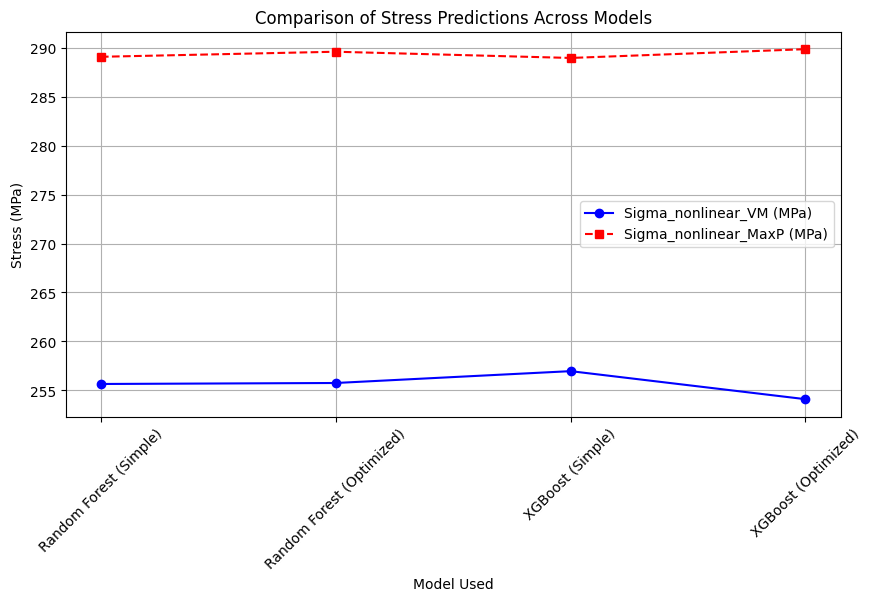

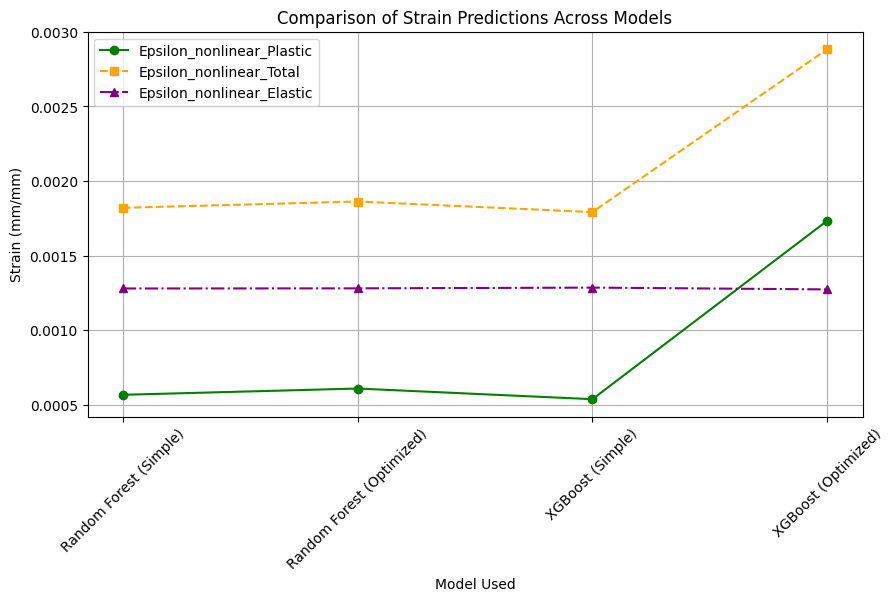

In [42]:
# Import libraries for plotting
import matplotlib.pyplot as plt

# Extract model names, predicted values, and timestamps from history log
if not history_log:
    print("No history log data available. Run predictions first.")
else:
    # Prepare data for plotting
    model_names = [entry['model'] for entry in history_log]
    timestamps = [entry['timestamp'] for entry in history_log]
    
    # Extract nonlinear stress predictions
    sigma_vm = [entry['outputs']['Sigma_nonlinear_VM (MPa)'] for entry in history_log]
    sigma_maxp = [entry['outputs']['Sigma_nonlinear_MaxP (MPa)'] for entry in history_log]
    
    # Extract nonlinear strain predictions
    epsilon_plastic = [entry['outputs']['Epsilon_nonlinear_Plastic (mm/mm)'] for entry in history_log]
    epsilon_total = [entry['outputs']['Epsilon_nonlinear_Total (mm/mm)'] for entry in history_log]
    epsilon_elastic = [entry['outputs']['Epsilon_nonlinear_Elastic (mm/mm)'] for entry in history_log]

    # Create figure for stress comparison
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.plot(model_names, sigma_vm, marker='o', linestyle='-', label="Sigma_nonlinear_VM (MPa)", color='b')
    ax1.plot(model_names, sigma_maxp, marker='s', linestyle='--', label="Sigma_nonlinear_MaxP (MPa)", color='r')
    
    ax1.set_xlabel("Model Used")
    ax1.set_ylabel("Stress (MPa)")
    ax1.set_title("Comparison of Stress Predictions Across Models")
    ax1.legend()
    ax1.grid(True)
    plt.xticks(rotation=45)  # Rotate model names for better visibility
    plt.show()

    # Create figure for strain comparison
    fig, ax2 = plt.subplots(figsize=(10, 5))
    
    ax2.plot(model_names, epsilon_plastic, marker='o', linestyle='-', label="Epsilon_nonlinear_Plastic", color='g')
    ax2.plot(model_names, epsilon_total, marker='s', linestyle='--', label="Epsilon_nonlinear_Total", color='orange')
    ax2.plot(model_names, epsilon_elastic, marker='^', linestyle='-.', label="Epsilon_nonlinear_Elastic", color='purple')

    ax2.set_xlabel("Model Used")
    ax2.set_ylabel("Strain (mm/mm)")
    ax2.set_title("Comparison of Strain Predictions Across Models")
    ax2.legend()
    ax2.grid(True)
    plt.xticks(rotation=45)
    plt.show()


In [51]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to plot stress and strain comparison
def plot_comparison(choice):
    with output:
        clear_output()
        
        if not history_log:
            print("No history log data available. Run predictions first.")
            return
        
        # Extract model names and outputs from history log
        model_names = [entry['model'] for entry in history_log]
        sigma_vm = [entry['outputs']['Equivalent VM NL Stress (MPa)'] for entry in history_log]
        sigma_maxp = [entry['outputs']['Maximum Principal NL Stress (MPa)'] for entry in history_log]
        epsilon_plastic = [entry['outputs']['Plastic Strain (mm/mm)'] for entry in history_log]
        epsilon_total = [entry['outputs']['Total Strain (mm/mm)'] for entry in history_log]
        epsilon_elastic = [entry['outputs']['Elastic Strain (mm/mm)'] for entry in history_log]

        x = np.arange(len(model_names))  # X-axis positions
        width = 0.3  # Bar width

        if choice == "Sigma_nonlinear_VM":
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x, sigma_vm, width, color='b', label="Sigma_nonlinear_VM (MPa)")
            ax.set_ylabel("Stress (MPa)")
            ax.set_title("Sigma_nonlinear_VM Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        elif choice == "Sigma_nonlinear_MaxP":
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x, sigma_maxp, width, color='r', label="Sigma_nonlinear_MaxP (MPa)")
            ax.set_ylabel("Stress (MPa)")
            ax.set_title("Sigma_nonlinear_MaxP Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        elif choice == "Strain Comparison":
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x - width, epsilon_plastic, width, color='g', label="Plastic Strain")
            ax.bar(x, epsilon_total, width, color='orange', label="Total Strain")
            ax.bar(x + width, epsilon_elastic, width, color='purple', label="Elastic Strain")
            ax.set_ylabel("Strain (mm/mm)")
            ax.set_title("Strain Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        plt.show()

# Create dropdown menu to select plot type
plot_selector = widgets.Dropdown(
    options=["Sigma_nonlinear_VM", "Sigma_nonlinear_MaxP", "Strain Comparison"],
    value="Sigma_nonlinear_VM",
    description="Plot Type:",
    layout={'width': '400px'}
)

# Create output widget for plots
output = widgets.Output()

# Create button to generate plot
plot_button = widgets.Button(description="Generate Plot")

# Define function for button click
def on_plot_button_click(b):
    plot_comparison(plot_selector.value)

# Attach function to button
plot_button.on_click(on_plot_button_click)

# Display UI elements
ui = widgets.VBox([plot_selector, plot_button, output])
display(ui)


In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to plot stress and strain comparison with error %
def plot_comparison(choice):
    with output:
        clear_output()
        
        if not history_log or len(history_log) < 2:
            print("Not enough history log data. Run predictions first.")
            return
        
        # Extract model names and outputs from history log
        model_names = [entry['model'] for entry in history_log]
        sigma_vm = np.array([entry['outputs']['Equivalent VM NL Stress (MPa)'] for entry in history_log])
        sigma_maxp = np.array([entry['outputs']['Maximum Principal NL Stress (MPa)'] for entry in history_log])
        epsilon_plastic = np.array([entry['outputs']['Plastic Strain (mm/mm)'] for entry in history_log])
        epsilon_total = np.array([entry['outputs']['Total Strain (mm/mm)'] for entry in history_log])
        epsilon_elastic = np.array([entry['outputs']['Elastic Strain (mm/mm)'] for entry in history_log])

        x = np.arange(len(model_names))  # X-axis positions
        width = 0.3  # Bar width

        # Compute error % compared to the first model as reference
        def compute_error(values):
            return np.abs((values - values[0]) / values[0]) * 100  # Absolute percentage error

        if choice == "Sigma_nonlinear_VM":
            error_vm = compute_error(sigma_vm)
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x, sigma_vm, width, color='b', label="Sigma_nonlinear_VM (MPa)")
            ax.plot(x, sigma_vm, 'bo--')  # Dotted line between bars
            for i, err in enumerate(error_vm):
                ax.text(x[i], sigma_vm[i] + 5, f"{err:.2f}%", ha='center', fontsize=10, color='black')

            ax.set_ylabel("Stress (MPa)")
            ax.set_title("Sigma_nonlinear_VM Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        elif choice == "Sigma_nonlinear_MaxP":
            error_maxp = compute_error(sigma_maxp)
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x, sigma_maxp, width, color='r', label="Sigma_nonlinear_MaxP (MPa)")
            ax.plot(x, sigma_maxp, 'ro--')  # Dotted line between bars
            for i, err in enumerate(error_maxp):
                ax.text(x[i], sigma_maxp[i] + 5, f"{err:.2f}%", ha='center', fontsize=10, color='black')

            ax.set_ylabel("Stress (MPa)")
            ax.set_title("Sigma_nonlinear_MaxP Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        elif choice == "Strain Comparison":
            error_plastic = compute_error(epsilon_plastic)
            error_total = compute_error(epsilon_total)
            error_elastic = compute_error(epsilon_elastic)

            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x - width, epsilon_plastic, width, color='g', label="Plastic Strain")
            ax.bar(x, epsilon_total, width, color='orange', label="Total Strain")
            ax.bar(x + width, epsilon_elastic, width, color='purple', label="Elastic Strain")

            # Dotted lines between bars
            ax.plot(x - width, epsilon_plastic, 'go--')
            ax.plot(x, epsilon_total, 'yo--')
            ax.plot(x + width, epsilon_elastic, 'mo--')

            # Display error % on top of each bar
            for i in range(len(x)):
                ax.text(x[i] - width, epsilon_plastic[i] + 0.0002, f"{error_plastic[i]:.2f}%", ha='center', fontsize=9, color='black')
                ax.text(x[i], epsilon_total[i] + 0.0002, f"{error_total[i]:.2f}%", ha='center', fontsize=9, color='black')
                ax.text(x[i] + width, epsilon_elastic[i] + 0.0002, f"{error_elastic[i]:.2f}%", ha='center', fontsize=9, color='black')

            ax.set_ylabel("Strain (mm/mm)")
            ax.set_title("Strain Predictions Across Models")
            ax.set_xticks(x)
            ax.set_xticklabels(model_names, rotation=45)
            ax.legend()
            ax.grid(axis='y')

        plt.show()

# Create dropdown menu to select plot type
plot_selector = widgets.Dropdown(
    options=["Sigma_nonlinear_VM", "Sigma_nonlinear_MaxP", "Strain Comparison"],
    value="Sigma_nonlinear_VM",
    description="Plot Type:",
    layout={'width': '400px'}
)

# Create output widget for plots
output = widgets.Output()

# Create button to generate plot
plot_button = widgets.Button(description="Generate Plot")

# Define function for button click
def on_plot_button_click(b):
    plot_comparison(plot_selector.value)

# Attach function to button
plot_button.on_click(on_plot_button_click)

# Display UI elements
ui = widgets.VBox([plot_selector, plot_button, output])
display(ui)
